In [1]:
import pandas as pd

# 데이터 불러오기
livinglab = pd.read_csv("/home/teanaps_home/workspace/local/livinglab_final2.csv")

## 1. 토큰화

### 1) 토큰화 준비

In [10]:
from teanaps.nlp import MorphologicalAnalyzer

# 텍스트 데이터 토큰화
# TEANAPS 형태소 분석기를 불러오기
ma = MorphologicalAnalyzer()
ma.set_tagger("okt")

In [6]:
'''
일반명사(NNG), 고유명사(NNP), 동사(VV), 형용사(VA), 보조 용언(VX)
'''

#고려할 태그
tag_list = ['NNG','NNP','VV','VA','VX']

# 계산할 tag만 남기고 다른 품사는 제거
def remove_word_by_tag(token,tag_list):
  temp = list()
  for k in range(len(token)):
    if token[k][1] in tag_list:
      temp.append(token[k][:-1])
    else:
      continue
  return temp


# 형태소 분석
def morph_analysis(comments):
  morph_token = []
  for comment in comments:
    token = ma.parse(comment)
    token = remove_word_by_tag(token, tag_list)
    morph_token.append(token)
  return morph_token


# 품사별 단어 빈도수 계산
from collections import defaultdict

def word_count(part, tokens): # part는 원하는 품사
  part_list = defaultdict(int)
  for token in tokens:
    for k in range(len(token)):
      if token[k][1] == part: # token의 품사가 지정한 품사이면
        part_list[token[k][0]] += 1
  return part_list

### 2) 단어 빈도수

In [6]:
comments = livinglab['start_point']

header_list = ['count','WORD','TAG']
count_df = pd.DataFrame(columns=header_list)

morph_token = morph_analysis(comments)
word_list = []
for tag in tag_list:
  word_list = word_count(tag, morph_token)
  sorted_list = sorted(word_list.items(), key=lambda x: x[1], reverse=True)
  for i in range(len(sorted_list)):
    count_df = count_df.append({'count':sorted_list[i][1], 'WORD':sorted_list[i][0],'TAG':tag}, ignore_index=True)
    count_df = count_df.sort_values('count', ascending=False)

count_df = count_df.reset_index(drop = True)
count_df.head(20)

,count,WORD,TAG
0,42,버스,NNG
1,41,했다,VV
2,31,이용,NNG
3,28,호출,NNG
4,26,시간,NNG
5,25,정류장,NNG
6,22,이동,NNG
7,22,위해,NNG
8,18,하였다,VV
9,18,것,NNG


In [7]:
# 단어 빈도수 파일 저장
count_df.to_csv("/home/teanaps_home/workspace/local/리빙랩_단어빈도수.csv", encoding = "utf-8", index = False)

### 3) 불용어처리

In [8]:
stopwords_df = pd.read_csv("/home/teanaps_home/workspace/local/리빙랩_단어빈도수.csv", encoding = "utf-8")
stopwords_df.head()

,count,WORD,TAG
0,42,버스,NNG
1,41,했다,VV
2,31,이용,NNG
3,28,호출,NNG
4,26,시간,NNG


In [9]:
# vv 삭제
stopwords_df = stopwords_df.loc[stopwords_df['TAG'] != "VV"]
stopwords_df.head(20)

,count,WORD,TAG
0,42,버스,NNG
2,31,이용,NNG
3,28,호출,NNG
4,26,시간,NNG
5,25,정류장,NNG
6,22,이동,NNG
7,22,위해,NNG
9,18,것,NNG
10,18,타고,NNG
11,17,를,NNG


In [10]:
stopwords_df = stopwords_df.reset_index(drop=True)

In [18]:
stopwords_df.loc[(stopwords_df["WORD"] == "") |
                 (stopwords_df["WORD"] == "위해") |
                 (stopwords_df["WORD"] == "것") |
                 (stopwords_df["WORD"] == "을") |
                 (stopwords_df["WORD"] == "의") |
                 (stopwords_df["WORD"] == "와") |
                 (stopwords_df["WORD"] == "에도") |    
                 (stopwords_df["WORD"] == "에서") |                 
                 (stopwords_df["WORD"] == "를") |
                 (stopwords_df["WORD"] == "가기") |
                 (stopwords_df["WORD"] == "후") |
                 (stopwords_df["WORD"] == "역") |
                 (stopwords_df["WORD"] == "집") |
                 (stopwords_df["WORD"] == "불") |
                 (stopwords_df["WORD"] == "있어") |
                 (stopwords_df["WORD"] == "수") |
                 (stopwords_df["WORD"] == "바로") |
                 (stopwords_df["WORD"] == "해") |
                 (stopwords_df["WORD"] == "번") |
                 (stopwords_df["WORD"] == "때문") |
                 (stopwords_df["WORD"] == "앞") |
                 (stopwords_df["WORD"] == "것") |
                 (stopwords_df["WORD"] == "벌써") |
                 (stopwords_df["WORD"] == "승") |
                 (stopwords_df["WORD"] == "내")  |
                 (stopwords_df["WORD"] == "봄") |
                 (stopwords_df["WORD"] == "그냥") |
                 (stopwords_df["WORD"] == "겸") |
                 (stopwords_df["WORD"] == "왜") |
                 (stopwords_df["WORD"] == "의") |
                 (stopwords_df["WORD"] == "밖") |
                 (stopwords_df["WORD"] == "창")
, "TAG"] = "불"

In [19]:
print(stopwords_df.loc[stopwords_df["TAG"] == "불", ["WORD", "TAG"]])


    WORD TAG
6     위해   불
7      것   불
9      를   불
11    가기   불
16     후   불
17     역   불
19     집   불
28    있어   불
31     수   불
32    바로   불
37     해   불
39     번   불
42    때문   불
43     앞   불
68     겸   불
92     봄   불
103   그냥   불
134    내   불
393    밖   불


## 2. 토큰화

In [20]:
livinglab.head()

,start_point,get_on,get_off,end_point,recommend,Tokens,Token_Content
0,일요일에도 여는 한의원이라 치료를 받고 집으로 돌아감,굳이 건너지 않고 버스를 탈 수 있는게 너무 좋았다마침 버스도 근처에 있어5분도 되...,마찬가지로 횡단보도를 건너지 않고 집에 바로 갈 수 있어 너무 좋았다 사소한 거지만...,버스를 탈때보다는 편하게 길도 안 건너고 도착했다,돌아가는 버스를 이용하는 사람들,"[(일요일, NNG, (0, 3)), (에도, JC, (3, 5)), (여, NNG...",일요일 여 한의원 치료 집
1,일을 마치고 필라테스 상담을 하고 집에 가는데 버스간격이 길다 그래서 아이모드를 이...,완정역에서 아이모드를 탑승했다 나밖에 탑승하지 않았고 편하게 집으로 왔다 그런데 평...,차가 진짜 멀미가 심하다 이 점때문에 버스나 택시를 이용할 것 같다는 생각을 했다,가까운 직선거리의 버스 노선이라면 버스를 이용하는게 낫겠다 하는 생각이 들었다,돌아가는 버스를 이용하는 사람들,"[(일, NNG, (0, 1)), (을, JC, (1, 2)), (마치, NNG, ...",일 마치 필라테스 상담 집 버스 간격 길다 I-MOD 이용 배차 간격 버스 고민
2,검단의 IMOD를 이용하기 전 IMOD가 먼저 도입됐고 관광하기 좋은 송도를 방문하...,센트럴파크에서 관광을 마친 후 테크노파크역에 있는 송도 현대아울렛에서 쇼핑을 하기 ...,탑승은 일반 버스카드를 태그하듯 QR코드를 기기에 태그하기만 하면 돼서 간편했다 I...,우선 IMOD 버스로 시민들이 보다 저렴한 가격에 쾌적한 환경의 이동수단을 제공받을...,비오는 날 등 기상이 안 좋은 날이나 짐이 많을 때 혹은 거동이 불편한 분이 이동할...,"[(검단, NNG, (0, 2)), (의, JC, (2, 3)), (IMOD, OL...",검단 를 이용 전 먼저 도입 관광 좋은 송도 방문 전철 타고 신연수역 하차 센트럴파...
3,여자친구와 함께 송도 센트럴파크에 놀러갔다 오랜 시간동안 걸으니 피로가 많이 쌓여서...,카페에서 IMOD호출을 눌렀는데 배차가 되지 않아 20분 정도 기다렸던 것 같다 처...,탑승한 사람이 나와 여자친구밖에 없어서 그런지 최단경로로 목적지까지 이동할 수 있었...,처음이라 비교적 짧은 거리만 이동했지만 다음에는 좀 더 긴 거리를 목적지로 설정해서...,\n추천 짐이 많거나 목적지까지 거리가 멀지만 시간여유가 있는 시민\n이유 1 ...,"[(여자친구, NNG, (0, 4)), (와, JC, (4, 5)), (함께, MA...",여자친구 송도 센트럴 파크 시간 동안 피로 근처 카페 가기 충분히 쉰 후 집 교통 ...
4,송도에서 놀기 위해 차를 타고 송도로 향했다 송도에서 여기저기를 방문할 예정이라 차...,20분 후에 IMOD에 탑승할 수 있었고 IMOD안에는 추가로 다른 승객이 탑승해 ...,기다린 시간을 포함하여 35분 만에 목적지에 도착할 수 있었다 IMOD를 다른 승객...,하지만 여전히 서비스는 편리했고 쾌적하게 이동할 수 있었다 배차가 진행되지 않았을 ...,\n추천 시간이 넉넉하고 쾌적하게 이동하고 싶은 사람\n이유 배차가 빠르게 진...,"[(송도, NNG, (0, 2)), (에서, JC, (2, 4)), ( , OL, ...",송도 위해 차 타고 송도로 향 송도 여기저기 방문 예정 차 계속 가지 힘들었고 무료...


In [21]:
ma.parse("마찬가지로 횡단보도를 건너지 않고 집에 바로 갈 수 있어 너무 좋았다")

[('마찬가지', 'NNG', (0, 4)),
 ('로', 'JC', (4, 5)),
 ('횡단보도', 'NNG', (6, 10)),
 ('를', 'JC', (10, 11)),
 ('건너지', 'VV', (12, 15)),
 ('않고', 'VV', (16, 18)),
 ('집', 'NNG', (19, 20)),
 ('에', 'JC', (20, 21)),
 ('바로', 'NNG', (22, 24)),
 ('갈', 'VV', (25, 26)),
 ('수', 'NNG', (27, 28)),
 ('있어', 'VA', (29, 31)),
 ('너무', 'MAG', (32, 34)),
 ('좋았다', 'VA', (35, 38))]

In [23]:
from teanaps.nlp import Processing
pro = Processing()

#고려할 태그
tag_list = ['NNG','NNP','VA']

comments = livinglab['start_point']

# 리뷰 토큰화 후 데이터 프레임에 추가 
tokens = []
tokenized_sentence_list = []
count_tokens = 0
for text in comments:
    pos_list = ma.parse(text)
    word_list = [p[0] for p in pos_list if p[1] in tag_list ]  

    for w in range(len(word_list)) :
        if "IMOD" in word_list[w]:
            word_list[w] = "I-MOD" 
        elif "지불" in word_list[w]:
            word_list[w] = "결제"
        elif "아이모드" in word_list[w]:
            word_list[w] = "I-MOD"
        elif "센트럴 파크" in word_list[w]:
            word_list[w] = "센트럴파크"
        elif "mod" in word_list[w]:
            word_list[w] = "I-MOD"

    noun = ' '.join(s for s in word_list)
    tokenized_sentence_list.append(noun)
    tokens.append(pos_list)

    count_tokens += len(pos_list)

print('총 토큰 개수 :', count_tokens)
livinglab['Tokens'] = tokens   # 새로운 열 추가
livinglab['Token_Content'] = tokenized_sentence_list
livinglab.head()

총 토큰 개수 : 2725


,start_point,get_on,get_off,end_point,recommend,Tokens,Token_Content
0,일요일에도 여는 한의원이라 치료를 받고 집으로 돌아감,굳이 건너지 않고 버스를 탈 수 있는게 너무 좋았다마침 버스도 근처에 있어5분도 되...,마찬가지로 횡단보도를 건너지 않고 집에 바로 갈 수 있어 너무 좋았다 사소한 거지만...,버스를 탈때보다는 편하게 길도 안 건너고 도착했다,돌아가는 버스를 이용하는 사람들,"[(일요일, NNG, (0, 3)), (에도, JC, (3, 5)), (여, NNG...",일요일 여 한의원 치료 집
1,일을 마치고 필라테스 상담을 하고 집에 가는데 버스간격이 길다 그래서 아이모드를 이...,완정역에서 아이모드를 탑승했다 나밖에 탑승하지 않았고 편하게 집으로 왔다 그런데 평...,차가 진짜 멀미가 심하다 이 점때문에 버스나 택시를 이용할 것 같다는 생각을 했다,가까운 직선거리의 버스 노선이라면 버스를 이용하는게 낫겠다 하는 생각이 들었다,돌아가는 버스를 이용하는 사람들,"[(일, NNG, (0, 1)), (을, JC, (1, 2)), (마치, NNG, ...",일 마치 필라테스 상담 집 버스 간격 길다 I-MOD 이용 배차 간격 버스 고민
2,검단의 IMOD를 이용하기 전 IMOD가 먼저 도입됐고 관광하기 좋은 송도를 방문하...,센트럴파크에서 관광을 마친 후 테크노파크역에 있는 송도 현대아울렛에서 쇼핑을 하기 ...,탑승은 일반 버스카드를 태그하듯 QR코드를 기기에 태그하기만 하면 돼서 간편했다 I...,우선 IMOD 버스로 시민들이 보다 저렴한 가격에 쾌적한 환경의 이동수단을 제공받을...,비오는 날 등 기상이 안 좋은 날이나 짐이 많을 때 혹은 거동이 불편한 분이 이동할...,"[(검단, NNG, (0, 2)), (의, JC, (2, 3)), (IMOD, OL...",검단 를 이용 전 먼저 도입 관광 좋은 송도 방문 전철 타고 신연수역 하차 센트럴파...
3,여자친구와 함께 송도 센트럴파크에 놀러갔다 오랜 시간동안 걸으니 피로가 많이 쌓여서...,카페에서 IMOD호출을 눌렀는데 배차가 되지 않아 20분 정도 기다렸던 것 같다 처...,탑승한 사람이 나와 여자친구밖에 없어서 그런지 최단경로로 목적지까지 이동할 수 있었...,처음이라 비교적 짧은 거리만 이동했지만 다음에는 좀 더 긴 거리를 목적지로 설정해서...,\n추천 짐이 많거나 목적지까지 거리가 멀지만 시간여유가 있는 시민\n이유 1 ...,"[(여자친구, NNG, (0, 4)), (와, JC, (4, 5)), (함께, MA...",여자친구 송도 센트럴 파크 시간 동안 피로 근처 카페 가기 충분히 쉰 후 집 교통 ...
4,송도에서 놀기 위해 차를 타고 송도로 향했다 송도에서 여기저기를 방문할 예정이라 차...,20분 후에 IMOD에 탑승할 수 있었고 IMOD안에는 추가로 다른 승객이 탑승해 ...,기다린 시간을 포함하여 35분 만에 목적지에 도착할 수 있었다 IMOD를 다른 승객...,하지만 여전히 서비스는 편리했고 쾌적하게 이동할 수 있었다 배차가 진행되지 않았을 ...,\n추천 시간이 넉넉하고 쾌적하게 이동하고 싶은 사람\n이유 배차가 빠르게 진...,"[(송도, NNG, (0, 2)), (에서, JC, (2, 4)), ( , OL, ...",송도 위해 차 타고 송도로 향 송도 여기저기 방문 예정 차 계속 가지 힘들었고 무료...


In [25]:
#고려할 태그
tag_list = ['NNG','NNP']

comments = livinglab['start_point']

# 리뷰 토큰화 후 데이터 프레임에 추가 
tokens = []
tokenized_sentence_list = []
count_tokens = 0
for text in comments:
    pos_list = ma.parse(text)
    word_list = [p[0] for p in pos_list if p[1] in tag_list]

    for w in range(len(word_list)) :
        if "IMOD" in word_list[w]:
            word_list[w] = "I-MOD" 
        elif "지불" in word_list[w]:
            word_list[w] = "결제"
        elif "아이모드" in word_list[w]:
            word_list[w] = "I-MOD"
        elif "센트럴 파크" in word_list[w]:
            word_list[w] = "센트럴파크"
        elif "mod" in word_list[w]:
            word_list[w] = "I-MOD"

    noun = ' '.join(s for s in word_list)
    tokenized_sentence_list.append(noun)
    tokens.append(pos_list)

    count_tokens += len(pos_list)

print('총 토큰 개수 :', count_tokens)
# livinglab['Tokens'] = tokens   # 새로운 열 추가
# livinglab['Token_Content'] = tokenized_sentence_list
livinglab['NNG_Token_Content'] = tokenized_sentence_list
livinglab.head()

총 토큰 개수 : 2725


,start_point,get_on,get_off,end_point,recommend,Tokens,Token_Content,NNG_Token_Content
0,일요일에도 여는 한의원이라 치료를 받고 집으로 돌아감,굳이 건너지 않고 버스를 탈 수 있는게 너무 좋았다마침 버스도 근처에 있어5분도 되...,마찬가지로 횡단보도를 건너지 않고 집에 바로 갈 수 있어 너무 좋았다 사소한 거지만...,버스를 탈때보다는 편하게 길도 안 건너고 도착했다,돌아가는 버스를 이용하는 사람들,"[(일요일, NNG, (0, 3)), (에도, JC, (3, 5)), (여, NNG...",일요일 여 한의원 치료 집,일요일 여 한의원 치료 집
1,일을 마치고 필라테스 상담을 하고 집에 가는데 버스간격이 길다 그래서 아이모드를 이...,완정역에서 아이모드를 탑승했다 나밖에 탑승하지 않았고 편하게 집으로 왔다 그런데 평...,차가 진짜 멀미가 심하다 이 점때문에 버스나 택시를 이용할 것 같다는 생각을 했다,가까운 직선거리의 버스 노선이라면 버스를 이용하는게 낫겠다 하는 생각이 들었다,돌아가는 버스를 이용하는 사람들,"[(일, NNG, (0, 1)), (을, JC, (1, 2)), (마치, NNG, ...",일 마치 필라테스 상담 집 버스 간격 길다 I-MOD 이용 배차 간격 버스 고민,일 마치 필라테스 상담 집 버스 간격 I-MOD 이용 배차 간격 버스 고민
2,검단의 IMOD를 이용하기 전 IMOD가 먼저 도입됐고 관광하기 좋은 송도를 방문하...,센트럴파크에서 관광을 마친 후 테크노파크역에 있는 송도 현대아울렛에서 쇼핑을 하기 ...,탑승은 일반 버스카드를 태그하듯 QR코드를 기기에 태그하기만 하면 돼서 간편했다 I...,우선 IMOD 버스로 시민들이 보다 저렴한 가격에 쾌적한 환경의 이동수단을 제공받을...,비오는 날 등 기상이 안 좋은 날이나 짐이 많을 때 혹은 거동이 불편한 분이 이동할...,"[(검단, NNG, (0, 2)), (의, JC, (2, 3)), (IMOD, OL...",검단 를 이용 전 먼저 도입 관광 좋은 송도 방문 전철 타고 신연수역 하차 센트럴파...,검단 를 이용 전 먼저 도입 관광 송도 방문 전철 타고 신연수역 하차 센트럴파크역 ...
3,여자친구와 함께 송도 센트럴파크에 놀러갔다 오랜 시간동안 걸으니 피로가 많이 쌓여서...,카페에서 IMOD호출을 눌렀는데 배차가 되지 않아 20분 정도 기다렸던 것 같다 처...,탑승한 사람이 나와 여자친구밖에 없어서 그런지 최단경로로 목적지까지 이동할 수 있었...,처음이라 비교적 짧은 거리만 이동했지만 다음에는 좀 더 긴 거리를 목적지로 설정해서...,\n추천 짐이 많거나 목적지까지 거리가 멀지만 시간여유가 있는 시민\n이유 1 ...,"[(여자친구, NNG, (0, 4)), (와, JC, (4, 5)), (함께, MA...",여자친구 송도 센트럴 파크 시간 동안 피로 근처 카페 가기 충분히 쉰 후 집 교통 ...,여자친구 송도 센트럴 파크 시간 동안 피로 근처 카페 가기 쉰 후 집 교통 편 버스...
4,송도에서 놀기 위해 차를 타고 송도로 향했다 송도에서 여기저기를 방문할 예정이라 차...,20분 후에 IMOD에 탑승할 수 있었고 IMOD안에는 추가로 다른 승객이 탑승해 ...,기다린 시간을 포함하여 35분 만에 목적지에 도착할 수 있었다 IMOD를 다른 승객...,하지만 여전히 서비스는 편리했고 쾌적하게 이동할 수 있었다 배차가 진행되지 않았을 ...,\n추천 시간이 넉넉하고 쾌적하게 이동하고 싶은 사람\n이유 배차가 빠르게 진...,"[(송도, NNG, (0, 2)), (에서, JC, (2, 4)), ( , OL, ...",송도 위해 차 타고 송도로 향 송도 여기저기 방문 예정 차 계속 가지 힘들었고 무료...,송도 위해 차 타고 송도로 향 송도 여기저기 방문 예정 차 계속 가지 무료 주차장 ...


In [27]:
from teanaps.nlp import Processing
pro = Processing()

#고려할 태그
tag_list = ['NNG','NNP','VA']

comments = livinglab['get_on']

# 리뷰 토큰화 후 데이터 프레임에 추가 
tokens = []
tokenized_sentence_list = []
count_tokens = 0
for text in comments:
    pos_list = ma.parse(text)
    word_list = [p[0] for p in pos_list if p[1] in tag_list]
    for w in range(len(word_list)) :
        if "IMOD" in word_list[w]:
            word_list[w] = "I-MOD" 
        elif "지불" in word_list[w]:
            word_list[w] = "결제"
        elif "아이모드" in word_list[w]:
            word_list[w] = "I-MOD"
        elif "센트럴 파크" in word_list[w]:
            word_list[w] = "센트럴파크"
        elif "mod" in word_list[w]:
            word_list[w] = "I-MOD"

    noun = ' '.join(s for s in word_list)
    tokenized_sentence_list.append(noun)
    tokens.append(pos_list)

    count_tokens += len(pos_list)

print('총 토큰 개수 :', count_tokens)
livinglab['Tokens'] = tokens   # 새로운 열 추가
livinglab['Token_Content'] = tokenized_sentence_list
livinglab.head()

총 토큰 개수 : 3185


,start_point,get_on,get_off,end_point,recommend,Tokens,Token_Content,NNG_Token_Content
0,일요일에도 여는 한의원이라 치료를 받고 집으로 돌아감,굳이 건너지 않고 버스를 탈 수 있는게 너무 좋았다마침 버스도 근처에 있어5분도 되...,마찬가지로 횡단보도를 건너지 않고 집에 바로 갈 수 있어 너무 좋았다 사소한 거지만...,버스를 탈때보다는 편하게 길도 안 건너고 도착했다,돌아가는 버스를 이용하는 사람들,"[(굳이, NNG, (0, 2)), (건너지, VV, (3, 6)), (않고, VV...",굳이 버스 탈 수 있는게 좋았다 마침 버스 근처 있어 바로 도착 원래 택시 이용 거...,일요일 여 한의원 치료 집
1,일을 마치고 필라테스 상담을 하고 집에 가는데 버스간격이 길다 그래서 아이모드를 이...,완정역에서 아이모드를 탑승했다 나밖에 탑승하지 않았고 편하게 집으로 왔다 그런데 평...,차가 진짜 멀미가 심하다 이 점때문에 버스나 택시를 이용할 것 같다는 생각을 했다,가까운 직선거리의 버스 노선이라면 버스를 이용하는게 낫겠다 하는 생각이 들었다,돌아가는 버스를 이용하는 사람들,"[(완정역, NNG, (0, 3)), (에서, JC, (3, 5)), (아이모드, ...",완정역 I-MOD 탑승 나 탑승 편하게 집 평일 저녁 이후 배차 앞 본격 많은 사람...,일 마치 필라테스 상담 집 버스 간격 I-MOD 이용 배차 간격 버스 고민
2,검단의 IMOD를 이용하기 전 IMOD가 먼저 도입됐고 관광하기 좋은 송도를 방문하...,센트럴파크에서 관광을 마친 후 테크노파크역에 있는 송도 현대아울렛에서 쇼핑을 하기 ...,탑승은 일반 버스카드를 태그하듯 QR코드를 기기에 태그하기만 하면 돼서 간편했다 I...,우선 IMOD 버스로 시민들이 보다 저렴한 가격에 쾌적한 환경의 이동수단을 제공받을...,비오는 날 등 기상이 안 좋은 날이나 짐이 많을 때 혹은 거동이 불편한 분이 이동할...,"[(센트럴, NNG, (0, 3)), (파크, NNG, (3, 5)), (에서, J...",센트럴 파크 관광 후 테크노파크역 있는 송도 아울렛 쇼핑 위해 어플 이용 를 호출 ...,검단 를 이용 전 먼저 도입 관광 송도 방문 전철 타고 신연수역 하차 센트럴파크역 ...
3,여자친구와 함께 송도 센트럴파크에 놀러갔다 오랜 시간동안 걸으니 피로가 많이 쌓여서...,카페에서 IMOD호출을 눌렀는데 배차가 되지 않아 20분 정도 기다렸던 것 같다 처...,탑승한 사람이 나와 여자친구밖에 없어서 그런지 최단경로로 목적지까지 이동할 수 있었...,처음이라 비교적 짧은 거리만 이동했지만 다음에는 좀 더 긴 거리를 목적지로 설정해서...,\n추천 짐이 많거나 목적지까지 거리가 멀지만 시간여유가 있는 시민\n이유 1 ...,"[(카페, NNG, (0, 2)), (에서, JC, (2, 4)), (IMOD, O...",카페 호출 배차 정도 것 같다 처음 점검 당황 이 부분 개선 필요한 것 같다 배차 ...,여자친구 송도 센트럴 파크 시간 동안 피로 근처 카페 가기 쉰 후 집 교통 편 버스...
4,송도에서 놀기 위해 차를 타고 송도로 향했다 송도에서 여기저기를 방문할 예정이라 차...,20분 후에 IMOD에 탑승할 수 있었고 IMOD안에는 추가로 다른 승객이 탑승해 ...,기다린 시간을 포함하여 35분 만에 목적지에 도착할 수 있었다 IMOD를 다른 승객...,하지만 여전히 서비스는 편리했고 쾌적하게 이동할 수 있었다 배차가 진행되지 않았을 ...,\n추천 시간이 넉넉하고 쾌적하게 이동하고 싶은 사람\n이유 배차가 빠르게 진...,"[(20분, SN, (0, 3)), ( , OL, (3, 4)), (후, NNG, ...",후 탑승 수 있었고 안 추가 다른 승객 탑승 있었다 를 다수 이용 매번 혼자 이용 ...,송도 위해 차 타고 송도로 향 송도 여기저기 방문 예정 차 계속 가지 무료 주차장 ...


In [28]:
#고려할 태그
tag_list = ['NNG','NNP']

comments = livinglab['get_on']

# 리뷰 토큰화 후 데이터 프레임에 추가 
tokens = []
tokenized_sentence_list = []
count_tokens = 0
for text in comments:
    pos_list = ma.parse(text)
    word_list = [p[0] for p in pos_list if p[1] in tag_list]  

    for w in range(len(word_list)) :
        if "IMOD" in word_list[w]:
            word_list[w] = "I-MOD" 
        elif "지불" in word_list[w]:
            word_list[w] = "결제"
        elif "아이모드" in word_list[w]:
            word_list[w] = "I-MOD"
        elif "센트럴 파크" in word_list[w]:
            word_list[w] = "센트럴파크"
        elif "mod" in word_list[w]:
            word_list[w] = "I-MOD"
            
    noun = ' '.join(s for s in word_list)
    tokenized_sentence_list.append(noun)
    tokens.append(pos_list)

    count_tokens += len(pos_list)

print('총 토큰 개수 :', count_tokens)
# livinglab['Tokens'] = tokens   # 새로운 열 추가
# livinglab['Token_Content'] = tokenized_sentence_list
livinglab['NNG_Token_Content'] = tokenized_sentence_list
livinglab.head()

총 토큰 개수 : 3185


,start_point,get_on,get_off,end_point,recommend,Tokens,Token_Content,NNG_Token_Content
0,일요일에도 여는 한의원이라 치료를 받고 집으로 돌아감,굳이 건너지 않고 버스를 탈 수 있는게 너무 좋았다마침 버스도 근처에 있어5분도 되...,마찬가지로 횡단보도를 건너지 않고 집에 바로 갈 수 있어 너무 좋았다 사소한 거지만...,버스를 탈때보다는 편하게 길도 안 건너고 도착했다,돌아가는 버스를 이용하는 사람들,"[(굳이, NNG, (0, 2)), (건너지, VV, (3, 6)), (않고, VV...",굳이 버스 탈 수 있는게 좋았다 마침 버스 근처 있어 바로 도착 원래 택시 이용 거...,굳이 버스 탈 수 마침 버스 근처 바로 도착 원래 택시 이용 거나 배차 간격 버스 ...
1,일을 마치고 필라테스 상담을 하고 집에 가는데 버스간격이 길다 그래서 아이모드를 이...,완정역에서 아이모드를 탑승했다 나밖에 탑승하지 않았고 편하게 집으로 왔다 그런데 평...,차가 진짜 멀미가 심하다 이 점때문에 버스나 택시를 이용할 것 같다는 생각을 했다,가까운 직선거리의 버스 노선이라면 버스를 이용하는게 낫겠다 하는 생각이 들었다,돌아가는 버스를 이용하는 사람들,"[(완정역, NNG, (0, 3)), (에서, JC, (3, 5)), (아이모드, ...",완정역 I-MOD 탑승 나 탑승 편하게 집 평일 저녁 이후 배차 앞 본격 많은 사람...,완정역 I-MOD 탑승 나 탑승 집 평일 저녁 이후 배차 앞 본격 사람 이용 얼마나...
2,검단의 IMOD를 이용하기 전 IMOD가 먼저 도입됐고 관광하기 좋은 송도를 방문하...,센트럴파크에서 관광을 마친 후 테크노파크역에 있는 송도 현대아울렛에서 쇼핑을 하기 ...,탑승은 일반 버스카드를 태그하듯 QR코드를 기기에 태그하기만 하면 돼서 간편했다 I...,우선 IMOD 버스로 시민들이 보다 저렴한 가격에 쾌적한 환경의 이동수단을 제공받을...,비오는 날 등 기상이 안 좋은 날이나 짐이 많을 때 혹은 거동이 불편한 분이 이동할...,"[(센트럴, NNG, (0, 3)), (파크, NNG, (3, 5)), (에서, J...",센트럴 파크 관광 후 테크노파크역 있는 송도 아울렛 쇼핑 위해 어플 이용 를 호출 ...,센트럴 파크 관광 후 테크노파크역 송도 아울렛 쇼핑 위해 어플 이용 를 호출 를 탑...
3,여자친구와 함께 송도 센트럴파크에 놀러갔다 오랜 시간동안 걸으니 피로가 많이 쌓여서...,카페에서 IMOD호출을 눌렀는데 배차가 되지 않아 20분 정도 기다렸던 것 같다 처...,탑승한 사람이 나와 여자친구밖에 없어서 그런지 최단경로로 목적지까지 이동할 수 있었...,처음이라 비교적 짧은 거리만 이동했지만 다음에는 좀 더 긴 거리를 목적지로 설정해서...,\n추천 짐이 많거나 목적지까지 거리가 멀지만 시간여유가 있는 시민\n이유 1 ...,"[(카페, NNG, (0, 2)), (에서, JC, (2, 4)), (IMOD, O...",카페 호출 배차 정도 것 같다 처음 점검 당황 이 부분 개선 필요한 것 같다 배차 ...,카페 호출 배차 정도 것 처음 점검 당황 이 부분 개선 것 배차 다행 마음 근처 정...
4,송도에서 놀기 위해 차를 타고 송도로 향했다 송도에서 여기저기를 방문할 예정이라 차...,20분 후에 IMOD에 탑승할 수 있었고 IMOD안에는 추가로 다른 승객이 탑승해 ...,기다린 시간을 포함하여 35분 만에 목적지에 도착할 수 있었다 IMOD를 다른 승객...,하지만 여전히 서비스는 편리했고 쾌적하게 이동할 수 있었다 배차가 진행되지 않았을 ...,\n추천 시간이 넉넉하고 쾌적하게 이동하고 싶은 사람\n이유 배차가 빠르게 진...,"[(20분, SN, (0, 3)), ( , OL, (3, 4)), (후, NNG, ...",후 탑승 수 있었고 안 추가 다른 승객 탑승 있었다 를 다수 이용 매번 혼자 이용 ...,후 탑승 수 안 추가 다른 승객 탑승 를 다수 이용 매번 혼자 이용 다른 승객 처음...


In [29]:
from teanaps.nlp import Processing
pro = Processing()

#고려할 태그
tag_list = ['NNG','NNP','VA']

comments = livinglab['get_off']

# 리뷰 토큰화 후 데이터 프레임에 추가 
tokens = []
tokenized_sentence_list = []
count_tokens = 0
for text in comments:
    pos_list = ma.parse(text)
    word_list = [p[0] for p in pos_list if p[1] in tag_list] 

    for w in range(len(word_list)) :
        if "IMOD" in word_list[w]:
            word_list[w] = "I-MOD" 
        elif "지불" in word_list[w]:
            word_list[w] = "결제"
        elif "아이모드" in word_list[w]:
            word_list[w] = "I-MOD"
        elif "센트럴 파크" in word_list[w]:
            word_list[w] = "센트럴파크"
        elif "mod" in word_list[w]:
            word_list[w] = "I-MOD"

    noun = ' '.join(s for s in word_list)
    tokenized_sentence_list.append(noun)
    tokens.append(pos_list)

    count_tokens += len(pos_list)

print('총 토큰 개수 :', count_tokens)
livinglab['Tokens'] = tokens   # 새로운 열 추가
livinglab['Token_Content'] = tokenized_sentence_list
livinglab.head()

총 토큰 개수 : 2628


,start_point,get_on,get_off,end_point,recommend,Tokens,Token_Content,NNG_Token_Content
0,일요일에도 여는 한의원이라 치료를 받고 집으로 돌아감,굳이 건너지 않고 버스를 탈 수 있는게 너무 좋았다마침 버스도 근처에 있어5분도 되...,마찬가지로 횡단보도를 건너지 않고 집에 바로 갈 수 있어 너무 좋았다 사소한 거지만...,버스를 탈때보다는 편하게 길도 안 건너고 도착했다,돌아가는 버스를 이용하는 사람들,"[(마찬가지, NNG, (0, 4)), (로, JC, (4, 5)), (횡단보도, ...",마찬가지 횡단보도 집 바로 수 있어 좋았다 사소한 거지 때 발판 게 정말 안전하고 느낌,굳이 버스 탈 수 마침 버스 근처 바로 도착 원래 택시 이용 거나 배차 간격 버스 ...
1,일을 마치고 필라테스 상담을 하고 집에 가는데 버스간격이 길다 그래서 아이모드를 이...,완정역에서 아이모드를 탑승했다 나밖에 탑승하지 않았고 편하게 집으로 왔다 그런데 평...,차가 진짜 멀미가 심하다 이 점때문에 버스나 택시를 이용할 것 같다는 생각을 했다,가까운 직선거리의 버스 노선이라면 버스를 이용하는게 낫겠다 하는 생각이 들었다,돌아가는 버스를 이용하는 사람들,"[(차가, VA, (0, 2)), (진짜, NNG, (3, 5)), (멀미, NNG...",차가 진짜 멀미 심하다 이 점 때문 버스 택시 이용 것 같다는 생각,완정역 I-MOD 탑승 나 탑승 집 평일 저녁 이후 배차 앞 본격 사람 이용 얼마나...
2,검단의 IMOD를 이용하기 전 IMOD가 먼저 도입됐고 관광하기 좋은 송도를 방문하...,센트럴파크에서 관광을 마친 후 테크노파크역에 있는 송도 현대아울렛에서 쇼핑을 하기 ...,탑승은 일반 버스카드를 태그하듯 QR코드를 기기에 태그하기만 하면 돼서 간편했다 I...,우선 IMOD 버스로 시민들이 보다 저렴한 가격에 쾌적한 환경의 이동수단을 제공받을...,비오는 날 등 기상이 안 좋은 날이나 짐이 많을 때 혹은 거동이 불편한 분이 이동할...,"[(탑승, NNG, (0, 2)), (은, JC, (2, 3)), (일반, NNG,...",탑승 일반 버스 카드 태그 듯 코드 기기 태그 간편했다 내부 굉장히 쾌적했다 인형 ...,센트럴 파크 관광 후 테크노파크역 송도 아울렛 쇼핑 위해 어플 이용 를 호출 를 탑...
3,여자친구와 함께 송도 센트럴파크에 놀러갔다 오랜 시간동안 걸으니 피로가 많이 쌓여서...,카페에서 IMOD호출을 눌렀는데 배차가 되지 않아 20분 정도 기다렸던 것 같다 처...,탑승한 사람이 나와 여자친구밖에 없어서 그런지 최단경로로 목적지까지 이동할 수 있었...,처음이라 비교적 짧은 거리만 이동했지만 다음에는 좀 더 긴 거리를 목적지로 설정해서...,\n추천 짐이 많거나 목적지까지 거리가 멀지만 시간여유가 있는 시민\n이유 1 ...,"[(탑승, NNG, (0, 2)), (한, JC, (2, 3)), (사람, NNG,...",탑승 사람 여자친구 없어서 그런지 최단 경로 목적지 이동 수 있었다 확실히 버스 좋...,카페 호출 배차 정도 것 처음 점검 당황 이 부분 개선 것 배차 다행 마음 근처 정...
4,송도에서 놀기 위해 차를 타고 송도로 향했다 송도에서 여기저기를 방문할 예정이라 차...,20분 후에 IMOD에 탑승할 수 있었고 IMOD안에는 추가로 다른 승객이 탑승해 ...,기다린 시간을 포함하여 35분 만에 목적지에 도착할 수 있었다 IMOD를 다른 승객...,하지만 여전히 서비스는 편리했고 쾌적하게 이동할 수 있었다 배차가 진행되지 않았을 ...,\n추천 시간이 넉넉하고 쾌적하게 이동하고 싶은 사람\n이유 배차가 빠르게 진...,"[(기다린, VV, (0, 3)), (시간, NNG, (4, 6)), (을, JC,...",시간 포함 목적지 도착 수 있었다 를 다른 승객 적 처음 다른 승객 때문 약간 경로...,후 탑승 수 안 추가 다른 승객 탑승 를 다수 이용 매번 혼자 이용 다른 승객 처음...


In [30]:
#고려할 태그
tag_list = ['NNG','NNP']

comments = livinglab['get_off']

# 리뷰 토큰화 후 데이터 프레임에 추가 
tokens = []
tokenized_sentence_list = []
count_tokens = 0
for text in comments:
    pos_list = ma.parse(text)
    word_list = [p[0] for p in pos_list if p[1] in tag_list]
    for w in range(len(word_list)) :
        if "IMOD" in word_list[w]:
            word_list[w] = "I-MOD" 
        elif "지불" in word_list[w]:
            word_list[w] = "결제"
        elif "아이모드" in word_list[w]:
            word_list[w] = "I-MOD"
        elif "센트럴 파크" in word_list[w]:
            word_list[w] = "센트럴파크"
        elif "mod" in word_list[w]:
            word_list[w] = "I-MOD"
            
    noun = ' '.join(s for s in word_list)
    tokenized_sentence_list.append(noun)
    tokens.append(pos_list)

    count_tokens += len(pos_list)

print('총 토큰 개수 :', count_tokens)
# livinglab['Tokens'] = tokens   # 새로운 열 추가
# livinglab['Token_Content'] = tokenized_sentence_list
livinglab['NNG_Token_Content'] = tokenized_sentence_list
livinglab.head()

총 토큰 개수 : 2628


,start_point,get_on,get_off,end_point,recommend,Tokens,Token_Content,NNG_Token_Content
0,일요일에도 여는 한의원이라 치료를 받고 집으로 돌아감,굳이 건너지 않고 버스를 탈 수 있는게 너무 좋았다마침 버스도 근처에 있어5분도 되...,마찬가지로 횡단보도를 건너지 않고 집에 바로 갈 수 있어 너무 좋았다 사소한 거지만...,버스를 탈때보다는 편하게 길도 안 건너고 도착했다,돌아가는 버스를 이용하는 사람들,"[(마찬가지, NNG, (0, 4)), (로, JC, (4, 5)), (횡단보도, ...",마찬가지 횡단보도 집 바로 수 있어 좋았다 사소한 거지 때 발판 게 정말 안전하고 느낌,마찬가지 횡단보도 집 바로 수 거지 때 발판 게 정말 느낌
1,일을 마치고 필라테스 상담을 하고 집에 가는데 버스간격이 길다 그래서 아이모드를 이...,완정역에서 아이모드를 탑승했다 나밖에 탑승하지 않았고 편하게 집으로 왔다 그런데 평...,차가 진짜 멀미가 심하다 이 점때문에 버스나 택시를 이용할 것 같다는 생각을 했다,가까운 직선거리의 버스 노선이라면 버스를 이용하는게 낫겠다 하는 생각이 들었다,돌아가는 버스를 이용하는 사람들,"[(차가, VA, (0, 2)), (진짜, NNG, (3, 5)), (멀미, NNG...",차가 진짜 멀미 심하다 이 점 때문 버스 택시 이용 것 같다는 생각,진짜 멀미 이 점 때문 버스 택시 이용 것 생각
2,검단의 IMOD를 이용하기 전 IMOD가 먼저 도입됐고 관광하기 좋은 송도를 방문하...,센트럴파크에서 관광을 마친 후 테크노파크역에 있는 송도 현대아울렛에서 쇼핑을 하기 ...,탑승은 일반 버스카드를 태그하듯 QR코드를 기기에 태그하기만 하면 돼서 간편했다 I...,우선 IMOD 버스로 시민들이 보다 저렴한 가격에 쾌적한 환경의 이동수단을 제공받을...,비오는 날 등 기상이 안 좋은 날이나 짐이 많을 때 혹은 거동이 불편한 분이 이동할...,"[(탑승, NNG, (0, 2)), (은, JC, (2, 3)), (일반, NNG,...",탑승 일반 버스 카드 태그 듯 코드 기기 태그 간편했다 내부 굉장히 쾌적했다 인형 ...,탑승 일반 버스 카드 태그 듯 코드 기기 태그 내부 인형 안전벨트 좌석 친밀 감 택...
3,여자친구와 함께 송도 센트럴파크에 놀러갔다 오랜 시간동안 걸으니 피로가 많이 쌓여서...,카페에서 IMOD호출을 눌렀는데 배차가 되지 않아 20분 정도 기다렸던 것 같다 처...,탑승한 사람이 나와 여자친구밖에 없어서 그런지 최단경로로 목적지까지 이동할 수 있었...,처음이라 비교적 짧은 거리만 이동했지만 다음에는 좀 더 긴 거리를 목적지로 설정해서...,\n추천 짐이 많거나 목적지까지 거리가 멀지만 시간여유가 있는 시민\n이유 1 ...,"[(탑승, NNG, (0, 2)), (한, JC, (2, 3)), (사람, NNG,...",탑승 사람 여자친구 없어서 그런지 최단 경로 목적지 이동 수 있었다 확실히 버스 좋...,탑승 사람 여자친구 최단 경로 목적지 이동 수 버스 점 생각 버스 버스 승 차감 정...
4,송도에서 놀기 위해 차를 타고 송도로 향했다 송도에서 여기저기를 방문할 예정이라 차...,20분 후에 IMOD에 탑승할 수 있었고 IMOD안에는 추가로 다른 승객이 탑승해 ...,기다린 시간을 포함하여 35분 만에 목적지에 도착할 수 있었다 IMOD를 다른 승객...,하지만 여전히 서비스는 편리했고 쾌적하게 이동할 수 있었다 배차가 진행되지 않았을 ...,\n추천 시간이 넉넉하고 쾌적하게 이동하고 싶은 사람\n이유 배차가 빠르게 진...,"[(기다린, VV, (0, 3)), (시간, NNG, (4, 6)), (을, JC,...",시간 포함 목적지 도착 수 있었다 를 다른 승객 적 처음 다른 승객 때문 약간 경로...,시간 포함 목적지 도착 수 를 다른 승객 적 처음 다른 승객 때문 약간 경로 것 미...


In [31]:
from teanaps.nlp import Processing
pro = Processing()

#고려할 태그
tag_list = ['NNG','NNP','VA']

comments = livinglab['end_point']

# 리뷰 토큰화 후 데이터 프레임에 추가 
tokens = []
tokenized_sentence_list = []
count_tokens = 0
for text in comments:
    pos_list = ma.parse(text)
    word_list = [p[0] for p in pos_list if p[1] in tag_list] 

    for w in range(len(word_list)) :
        if "IMOD" in word_list[w]:
            word_list[w] = "I-MOD" 
        elif "지불" in word_list[w]:
            word_list[w] = "결제"
        elif "아이모드" in word_list[w]:
            word_list[w] = "I-MOD"
        elif "센트럴 파크" in word_list[w]:
            word_list[w] = "센트럴파크"
        elif "mod" in word_list[w]:
            word_list[w] = "I-MOD"
            
    noun = ' '.join(s for s in word_list)
    tokenized_sentence_list.append(noun)
    tokens.append(pos_list)

    count_tokens += len(pos_list)

print('총 토큰 개수 :', count_tokens)
livinglab['Tokens'] = tokens   # 새로운 열 추가
livinglab['Token_Content'] = tokenized_sentence_list
livinglab.head()

총 토큰 개수 : 3041


,start_point,get_on,get_off,end_point,recommend,Tokens,Token_Content,NNG_Token_Content
0,일요일에도 여는 한의원이라 치료를 받고 집으로 돌아감,굳이 건너지 않고 버스를 탈 수 있는게 너무 좋았다마침 버스도 근처에 있어5분도 되...,마찬가지로 횡단보도를 건너지 않고 집에 바로 갈 수 있어 너무 좋았다 사소한 거지만...,버스를 탈때보다는 편하게 길도 안 건너고 도착했다,돌아가는 버스를 이용하는 사람들,"[(버스, NNG, (0, 2)), (를, JC, (2, 3)), (탈때, NNG,...",버스 탈때 편하게 길도 안 도착,마찬가지 횡단보도 집 바로 수 거지 때 발판 게 정말 느낌
1,일을 마치고 필라테스 상담을 하고 집에 가는데 버스간격이 길다 그래서 아이모드를 이...,완정역에서 아이모드를 탑승했다 나밖에 탑승하지 않았고 편하게 집으로 왔다 그런데 평...,차가 진짜 멀미가 심하다 이 점때문에 버스나 택시를 이용할 것 같다는 생각을 했다,가까운 직선거리의 버스 노선이라면 버스를 이용하는게 낫겠다 하는 생각이 들었다,돌아가는 버스를 이용하는 사람들,"[(가까운, VA, (0, 3)), (직선, NNG, (4, 6)), (거리, NN...",가까운 직선 거리 버스 노선 라면 버스 이용 생각,진짜 멀미 이 점 때문 버스 택시 이용 것 생각
2,검단의 IMOD를 이용하기 전 IMOD가 먼저 도입됐고 관광하기 좋은 송도를 방문하...,센트럴파크에서 관광을 마친 후 테크노파크역에 있는 송도 현대아울렛에서 쇼핑을 하기 ...,탑승은 일반 버스카드를 태그하듯 QR코드를 기기에 태그하기만 하면 돼서 간편했다 I...,우선 IMOD 버스로 시민들이 보다 저렴한 가격에 쾌적한 환경의 이동수단을 제공받을...,비오는 날 등 기상이 안 좋은 날이나 짐이 많을 때 혹은 거동이 불편한 분이 이동할...,"[(우선, NNG, (0, 2)), (IMOD, OL, (3, 7)), (버스, N...",우선 버스 시민 저렴한 가격 쾌적한 환경 수단 제공 수 있다는 점 매우 좋다 저렴하...,탑승 일반 버스 카드 태그 듯 코드 기기 태그 내부 인형 안전벨트 좌석 친밀 감 택...
3,여자친구와 함께 송도 센트럴파크에 놀러갔다 오랜 시간동안 걸으니 피로가 많이 쌓여서...,카페에서 IMOD호출을 눌렀는데 배차가 되지 않아 20분 정도 기다렸던 것 같다 처...,탑승한 사람이 나와 여자친구밖에 없어서 그런지 최단경로로 목적지까지 이동할 수 있었...,처음이라 비교적 짧은 거리만 이동했지만 다음에는 좀 더 긴 거리를 목적지로 설정해서...,\n추천 짐이 많거나 목적지까지 거리가 멀지만 시간여유가 있는 시민\n이유 1 ...,"[(처음, NNG, (0, 2)), (이라, JC, (2, 4)), (비교, NNG...",처음 비교 짧은 거리 이동 다음 좀 더 거리 목적지 설정 이동 기존 대중교통 이동 ...,탑승 사람 여자친구 최단 경로 목적지 이동 수 버스 점 생각 버스 버스 승 차감 정...
4,송도에서 놀기 위해 차를 타고 송도로 향했다 송도에서 여기저기를 방문할 예정이라 차...,20분 후에 IMOD에 탑승할 수 있었고 IMOD안에는 추가로 다른 승객이 탑승해 ...,기다린 시간을 포함하여 35분 만에 목적지에 도착할 수 있었다 IMOD를 다른 승객...,하지만 여전히 서비스는 편리했고 쾌적하게 이동할 수 있었다 배차가 진행되지 않았을 ...,\n추천 시간이 넉넉하고 쾌적하게 이동하고 싶은 사람\n이유 배차가 빠르게 진...,"[(하지만, MAJ, (0, 3)), ( , OL, (3, 4)), (여전히, VA...",여전히 서비스 편리했고 쾌적하게 이동 수 있었다 배차 진행 때 위해 현재 운행 중이...,시간 포함 목적지 도착 수 를 다른 승객 적 처음 다른 승객 때문 약간 경로 것 미...


In [32]:
#고려할 태그
tag_list = ['NNG','NNP']

comments = livinglab['end_point']

# 리뷰 토큰화 후 데이터 프레임에 추가 
tokens = []
tokenized_sentence_list = []
count_tokens = 0
for text in comments:
    pos_list = ma.parse(text)
    word_list = [p[0] for p in pos_list if p[1] in tag_list] 

    for w in range(len(word_list)) :
        if "IMOD" in word_list[w]:
            word_list[w] = "I-MOD" 
        elif "지불" in word_list[w]:
            word_list[w] = "결제"
        elif "아이모드" in word_list[w]:
            word_list[w] = "I-MOD"
        elif "센트럴 파크" in word_list[w]:
            word_list[w] = "센트럴파크"
        elif "mod" in word_list[w]:
            word_list[w] = "I-MOD"
    noun = ' '.join(s for s in word_list)
    tokenized_sentence_list.append(noun)
    tokens.append(pos_list)

    count_tokens += len(pos_list)

print('총 토큰 개수 :', count_tokens)
# livinglab['Tokens'] = tokens   # 새로운 열 추가
# livinglab['Token_Content'] = tokenized_sentence_list
livinglab['NNG_Token_Content'] = tokenized_sentence_list
livinglab.head()

총 토큰 개수 : 3041


,start_point,get_on,get_off,end_point,recommend,Tokens,Token_Content,NNG_Token_Content
0,일요일에도 여는 한의원이라 치료를 받고 집으로 돌아감,굳이 건너지 않고 버스를 탈 수 있는게 너무 좋았다마침 버스도 근처에 있어5분도 되...,마찬가지로 횡단보도를 건너지 않고 집에 바로 갈 수 있어 너무 좋았다 사소한 거지만...,버스를 탈때보다는 편하게 길도 안 건너고 도착했다,돌아가는 버스를 이용하는 사람들,"[(버스, NNG, (0, 2)), (를, JC, (2, 3)), (탈때, NNG,...",버스 탈때 편하게 길도 안 도착,버스 탈때 안 도착
1,일을 마치고 필라테스 상담을 하고 집에 가는데 버스간격이 길다 그래서 아이모드를 이...,완정역에서 아이모드를 탑승했다 나밖에 탑승하지 않았고 편하게 집으로 왔다 그런데 평...,차가 진짜 멀미가 심하다 이 점때문에 버스나 택시를 이용할 것 같다는 생각을 했다,가까운 직선거리의 버스 노선이라면 버스를 이용하는게 낫겠다 하는 생각이 들었다,돌아가는 버스를 이용하는 사람들,"[(가까운, VA, (0, 3)), (직선, NNG, (4, 6)), (거리, NN...",가까운 직선 거리 버스 노선 라면 버스 이용 생각,직선 거리 버스 노선 라면 버스 이용 생각
2,검단의 IMOD를 이용하기 전 IMOD가 먼저 도입됐고 관광하기 좋은 송도를 방문하...,센트럴파크에서 관광을 마친 후 테크노파크역에 있는 송도 현대아울렛에서 쇼핑을 하기 ...,탑승은 일반 버스카드를 태그하듯 QR코드를 기기에 태그하기만 하면 돼서 간편했다 I...,우선 IMOD 버스로 시민들이 보다 저렴한 가격에 쾌적한 환경의 이동수단을 제공받을...,비오는 날 등 기상이 안 좋은 날이나 짐이 많을 때 혹은 거동이 불편한 분이 이동할...,"[(우선, NNG, (0, 2)), (IMOD, OL, (3, 7)), (버스, N...",우선 버스 시민 저렴한 가격 쾌적한 환경 수단 제공 수 있다는 점 매우 좋다 저렴하...,우선 버스 시민 가격 환경 수단 제공 수 점 매우 콜 택시 인상 계양 신도시 먼저 ...
3,여자친구와 함께 송도 센트럴파크에 놀러갔다 오랜 시간동안 걸으니 피로가 많이 쌓여서...,카페에서 IMOD호출을 눌렀는데 배차가 되지 않아 20분 정도 기다렸던 것 같다 처...,탑승한 사람이 나와 여자친구밖에 없어서 그런지 최단경로로 목적지까지 이동할 수 있었...,처음이라 비교적 짧은 거리만 이동했지만 다음에는 좀 더 긴 거리를 목적지로 설정해서...,\n추천 짐이 많거나 목적지까지 거리가 멀지만 시간여유가 있는 시민\n이유 1 ...,"[(처음, NNG, (0, 2)), (이라, JC, (2, 4)), (비교, NNG...",처음 비교 짧은 거리 이동 다음 좀 더 거리 목적지 설정 이동 기존 대중교통 이동 ...,처음 비교 거리 이동 다음 좀 더 거리 목적지 설정 이동 기존 대중교통 이동 것 것...
4,송도에서 놀기 위해 차를 타고 송도로 향했다 송도에서 여기저기를 방문할 예정이라 차...,20분 후에 IMOD에 탑승할 수 있었고 IMOD안에는 추가로 다른 승객이 탑승해 ...,기다린 시간을 포함하여 35분 만에 목적지에 도착할 수 있었다 IMOD를 다른 승객...,하지만 여전히 서비스는 편리했고 쾌적하게 이동할 수 있었다 배차가 진행되지 않았을 ...,\n추천 시간이 넉넉하고 쾌적하게 이동하고 싶은 사람\n이유 배차가 빠르게 진...,"[(하지만, MAJ, (0, 3)), ( , OL, (3, 4)), (여전히, VA...",여전히 서비스 편리했고 쾌적하게 이동 수 있었다 배차 진행 때 위해 현재 운행 중이...,서비스 이동 수 배차 진행 때 위해 현재 운행 중이 의 위치 아이콘 지도 표시 거 ...


In [33]:
from teanaps.nlp import Processing
pro = Processing()

#고려할 태그
tag_list = ['NNG','NNP','VA']

comments = livinglab['recommend']

# 리뷰 토큰화 후 데이터 프레임에 추가 
tokens = []
tokenized_sentence_list = []
count_tokens = 0
for text in comments:
    pos_list = ma.parse(text)
    word_list = [p[0] for p in pos_list if p[1] in tag_list]

    for w in range(len(word_list)) :
        if "IMOD" in word_list[w]:
            word_list[w] = "I-MOD" 
        elif "지불" in word_list[w]:
            word_list[w] = "결제"
        elif "아이모드" in word_list[w]:
            word_list[w] = "I-MOD"
        elif "센트럴 파크" in word_list[w]:
            word_list[w] = "센트럴파크"
        elif "mod" in word_list[w]:
            word_list[w] = "I-MOD"
            
    noun = ' '.join(s for s in word_list)
    tokenized_sentence_list.append(noun)
    tokens.append(pos_list)

    count_tokens += len(pos_list)

print('총 토큰 개수 :', count_tokens)
livinglab['Tokens'] = tokens   # 새로운 열 추가
livinglab['Token_Content'] = tokenized_sentence_list
livinglab.head()

총 토큰 개수 : 2873


,start_point,get_on,get_off,end_point,recommend,Tokens,Token_Content,NNG_Token_Content
0,일요일에도 여는 한의원이라 치료를 받고 집으로 돌아감,굳이 건너지 않고 버스를 탈 수 있는게 너무 좋았다마침 버스도 근처에 있어5분도 되...,마찬가지로 횡단보도를 건너지 않고 집에 바로 갈 수 있어 너무 좋았다 사소한 거지만...,버스를 탈때보다는 편하게 길도 안 건너고 도착했다,돌아가는 버스를 이용하는 사람들,"[(돌아가는, VV, (0, 4)), (버스, NNG, (5, 7)), (를, JC...",버스 이용 사람,버스 탈때 안 도착
1,일을 마치고 필라테스 상담을 하고 집에 가는데 버스간격이 길다 그래서 아이모드를 이...,완정역에서 아이모드를 탑승했다 나밖에 탑승하지 않았고 편하게 집으로 왔다 그런데 평...,차가 진짜 멀미가 심하다 이 점때문에 버스나 택시를 이용할 것 같다는 생각을 했다,가까운 직선거리의 버스 노선이라면 버스를 이용하는게 낫겠다 하는 생각이 들었다,돌아가는 버스를 이용하는 사람들,"[(돌아가는, VV, (0, 4)), (버스, NNG, (5, 7)), (를, JC...",버스 이용 사람,직선 거리 버스 노선 라면 버스 이용 생각
2,검단의 IMOD를 이용하기 전 IMOD가 먼저 도입됐고 관광하기 좋은 송도를 방문하...,센트럴파크에서 관광을 마친 후 테크노파크역에 있는 송도 현대아울렛에서 쇼핑을 하기 ...,탑승은 일반 버스카드를 태그하듯 QR코드를 기기에 태그하기만 하면 돼서 간편했다 I...,우선 IMOD 버스로 시민들이 보다 저렴한 가격에 쾌적한 환경의 이동수단을 제공받을...,비오는 날 등 기상이 안 좋은 날이나 짐이 많을 때 혹은 거동이 불편한 분이 이동할...,"[(비오는, VV, (0, 3)), (날, NNG, (4, 5)), (등, NNG,...",날 등 기상 안 좋은 날 짐 많을 때 거동 불편한 분 이동 생기 택시 대신 를 이용...,우선 버스 시민 가격 환경 수단 제공 수 점 매우 콜 택시 인상 계양 신도시 먼저 ...
3,여자친구와 함께 송도 센트럴파크에 놀러갔다 오랜 시간동안 걸으니 피로가 많이 쌓여서...,카페에서 IMOD호출을 눌렀는데 배차가 되지 않아 20분 정도 기다렸던 것 같다 처...,탑승한 사람이 나와 여자친구밖에 없어서 그런지 최단경로로 목적지까지 이동할 수 있었...,처음이라 비교적 짧은 거리만 이동했지만 다음에는 좀 더 긴 거리를 목적지로 설정해서...,\n추천 짐이 많거나 목적지까지 거리가 멀지만 시간여유가 있는 시민\n이유 1 ...,"[( \n, OL, (0, 2)), (추천, NNG, (2, 4)), (짐, NNG...",추천 짐 많거나 목적지 거리 멀지만 시간 여유 있는 시민 이유 탑승 때 발판 버스 ...,처음 비교 거리 이동 다음 좀 더 거리 목적지 설정 이동 기존 대중교통 이동 것 것...
4,송도에서 놀기 위해 차를 타고 송도로 향했다 송도에서 여기저기를 방문할 예정이라 차...,20분 후에 IMOD에 탑승할 수 있었고 IMOD안에는 추가로 다른 승객이 탑승해 ...,기다린 시간을 포함하여 35분 만에 목적지에 도착할 수 있었다 IMOD를 다른 승객...,하지만 여전히 서비스는 편리했고 쾌적하게 이동할 수 있었다 배차가 진행되지 않았을 ...,\n추천 시간이 넉넉하고 쾌적하게 이동하고 싶은 사람\n이유 배차가 빠르게 진...,"[( \n, OL, (0, 2)), (추천, NNG, (2, 4)), (시간, NN...",추천 시간 넉넉하고 쾌적하게 이동 사람 이유 배차 빠르게 진행 안될 수 있고 중간 ...,서비스 이동 수 배차 진행 때 위해 현재 운행 중이 의 위치 아이콘 지도 표시 거 ...


In [34]:
#고려할 태그
tag_list = ['NNG','NNP']

comments = livinglab['recommend']

# 리뷰 토큰화 후 데이터 프레임에 추가 
tokens = []
tokenized_sentence_list = []
count_tokens = 0
for text in comments:
    pos_list = ma.parse(text)
    word_list = [p[0] for p in pos_list if p[1] in tag_list]

    for w in range(len(word_list)) :
        if "IMOD" in word_list[w]:
            word_list[w] = "I-MOD" 
        elif "지불" in word_list[w]:
            word_list[w] = "결제"
        elif "아이모드" in word_list[w]:
            word_list[w] = "I-MOD"
        elif "센트럴 파크" in word_list[w]:
            word_list[w] = "센트럴파크"
        elif "mod" in word_list[w]:
            word_list[w] = "I-MOD"
            
    noun = ' '.join(s for s in word_list)
    tokenized_sentence_list.append(noun)
    tokens.append(pos_list)

    count_tokens += len(pos_list)

print('총 토큰 개수 :', count_tokens)
# livinglab['Tokens'] = tokens   # 새로운 열 추가
# livinglab['Token_Content'] = tokenized_sentence_list
livinglab['NNG_Token_Content'] = tokenized_sentence_list
livinglab.head()

총 토큰 개수 : 2873


,start_point,get_on,get_off,end_point,recommend,Tokens,Token_Content,NNG_Token_Content
0,일요일에도 여는 한의원이라 치료를 받고 집으로 돌아감,굳이 건너지 않고 버스를 탈 수 있는게 너무 좋았다마침 버스도 근처에 있어5분도 되...,마찬가지로 횡단보도를 건너지 않고 집에 바로 갈 수 있어 너무 좋았다 사소한 거지만...,버스를 탈때보다는 편하게 길도 안 건너고 도착했다,돌아가는 버스를 이용하는 사람들,"[(돌아가는, VV, (0, 4)), (버스, NNG, (5, 7)), (를, JC...",버스 이용 사람,버스 이용 사람
1,일을 마치고 필라테스 상담을 하고 집에 가는데 버스간격이 길다 그래서 아이모드를 이...,완정역에서 아이모드를 탑승했다 나밖에 탑승하지 않았고 편하게 집으로 왔다 그런데 평...,차가 진짜 멀미가 심하다 이 점때문에 버스나 택시를 이용할 것 같다는 생각을 했다,가까운 직선거리의 버스 노선이라면 버스를 이용하는게 낫겠다 하는 생각이 들었다,돌아가는 버스를 이용하는 사람들,"[(돌아가는, VV, (0, 4)), (버스, NNG, (5, 7)), (를, JC...",버스 이용 사람,버스 이용 사람
2,검단의 IMOD를 이용하기 전 IMOD가 먼저 도입됐고 관광하기 좋은 송도를 방문하...,센트럴파크에서 관광을 마친 후 테크노파크역에 있는 송도 현대아울렛에서 쇼핑을 하기 ...,탑승은 일반 버스카드를 태그하듯 QR코드를 기기에 태그하기만 하면 돼서 간편했다 I...,우선 IMOD 버스로 시민들이 보다 저렴한 가격에 쾌적한 환경의 이동수단을 제공받을...,비오는 날 등 기상이 안 좋은 날이나 짐이 많을 때 혹은 거동이 불편한 분이 이동할...,"[(비오는, VV, (0, 3)), (날, NNG, (4, 5)), (등, NNG,...",날 등 기상 안 좋은 날 짐 많을 때 거동 불편한 분 이동 생기 택시 대신 를 이용...,날 등 기상 안 날 짐 때 거동 분 이동 생기 택시 대신 를 이용 시 전철 이용 것...
3,여자친구와 함께 송도 센트럴파크에 놀러갔다 오랜 시간동안 걸으니 피로가 많이 쌓여서...,카페에서 IMOD호출을 눌렀는데 배차가 되지 않아 20분 정도 기다렸던 것 같다 처...,탑승한 사람이 나와 여자친구밖에 없어서 그런지 최단경로로 목적지까지 이동할 수 있었...,처음이라 비교적 짧은 거리만 이동했지만 다음에는 좀 더 긴 거리를 목적지로 설정해서...,\n추천 짐이 많거나 목적지까지 거리가 멀지만 시간여유가 있는 시민\n이유 1 ...,"[( \n, OL, (0, 2)), (추천, NNG, (2, 4)), (짐, NNG...",추천 짐 많거나 목적지 거리 멀지만 시간 여유 있는 시민 이유 탑승 때 발판 버스 ...,추천 짐 목적지 거리 시간 여유 시민 이유 탑승 때 발판 버스 지하철 탑승 때문 짐...
4,송도에서 놀기 위해 차를 타고 송도로 향했다 송도에서 여기저기를 방문할 예정이라 차...,20분 후에 IMOD에 탑승할 수 있었고 IMOD안에는 추가로 다른 승객이 탑승해 ...,기다린 시간을 포함하여 35분 만에 목적지에 도착할 수 있었다 IMOD를 다른 승객...,하지만 여전히 서비스는 편리했고 쾌적하게 이동할 수 있었다 배차가 진행되지 않았을 ...,\n추천 시간이 넉넉하고 쾌적하게 이동하고 싶은 사람\n이유 배차가 빠르게 진...,"[( \n, OL, (0, 2)), (추천, NNG, (2, 4)), (시간, NN...",추천 시간 넉넉하고 쾌적하게 이동 사람 이유 배차 빠르게 진행 안될 수 있고 중간 ...,추천 시간 이동 사람 이유 배차 진행 수 중간 경로 변경 수 시간 사람 늦 수


### TF-IDF 워드클라우드(명사)

In [11]:
from teanaps.text_analysis import TfidfCalculator

tfidf = TfidfCalculator()

In [37]:
# TF/TF-IDF 값을 계산합니다.(명사)
fa = tfidf.calculation_tfidf(livinglab["NNG_Token_Content"], tfidf_count=100, tfidf_state=True)

In [38]:
print(tfidf.get_tf_list())

[['버스', 52], ['이용', 51], ['추천', 42], ['이유', 25], ['사람', 24], ['시간', 20], ['배차', 20], ['탑승', 17], ['택시', 13], ['목적지', 13], ['때문', 12], ['정류장', 12], ['i-mod', 12], ['이동', 11], ['호출', 11], ['지역', 10], ['대중교통', 9], ['아이', 9], ['시민', 8], ['경우', 8], ['서비스', 8], ['생각', 8], ['간격', 8], ['기능', 8], ['신도시', 7], ['추가', 7], ['도착', 7], ['홍보', 7], ['노선', 7], ['가기', 6], ['환승', 6], ['배달', 6], ['가지', 6], ['계양역', 6], ['이상', 6], ['결제', 6], ['부모님', 6], ['계양', 6], ['교통', 5], ['송도', 5], ['기사', 5], ['어플', 5], ['일반', 5], ['사용', 5], ['거리', 4], ['발판', 4], ['지하철', 4], ['바로', 4], ['경로', 4], ['인원', 4], ['타고', 4], ['실제', 4], ['수단', 4], ['부분', 4], ['모임', 4], ['인천대학교', 4], ['비교', 4], ['요금', 4], ['알림', 4], ['자주', 4], ['인천', 4], ['운행', 4], ['처음', 4], ['진행', 3], ['거의', 3], ['음식', 3], ['평소', 3], ['오늘', 3], ['안쪽', 3], ['방법', 3], ['시설', 3], ['마트', 3], ['문제', 3], ['운영', 3], ['개선', 3], ['확장', 3], ['먼저', 3], ['활용', 3], ['혜택', 3], ['표시', 3], ['네이버', 3], ['길찾기', 3], ['사시', 3], ['아이트립', 3], ['장점', 3], ['체험', 3], ['조금', 3], ['또한', 

In [39]:
# TF/TF-IDF 계산결과를 그래프로 표현합니다.
# 그래프에 표현할 빈도기준 Top N 개를 숫자로 입력합니다.
tfidf.draw_tfidf(100)

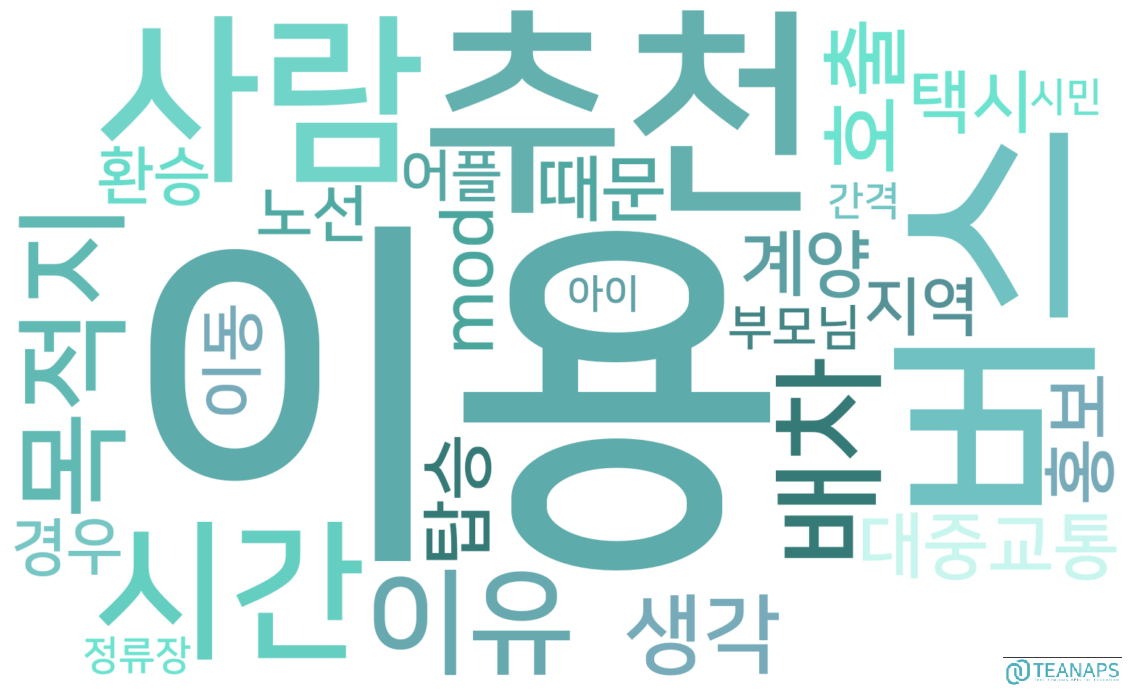

In [40]:
# TF-IDF 기준 워드클라우드를 출력합니다.
count_dict = tfidf.get_tfidf_dict()
tfidf.get_wordcloud(count_dict)

### TF-IDF 워드클라우드(명사+형용사)

In [41]:
# TF/TF-IDF 값을 계산합니다.(명사, 형용사)
tfidf.calculation_tfidf(livinglab["Token_Content"], tfidf_count=100, tfidf_state=True)

In [42]:
# TF/TF-IDF 계산결과를 그래프로 표현합니다.
# 그래프에 표현할 빈도기준 Top N 개를 숫자로 입력합니다.
tfidf.draw_tfidf(100)

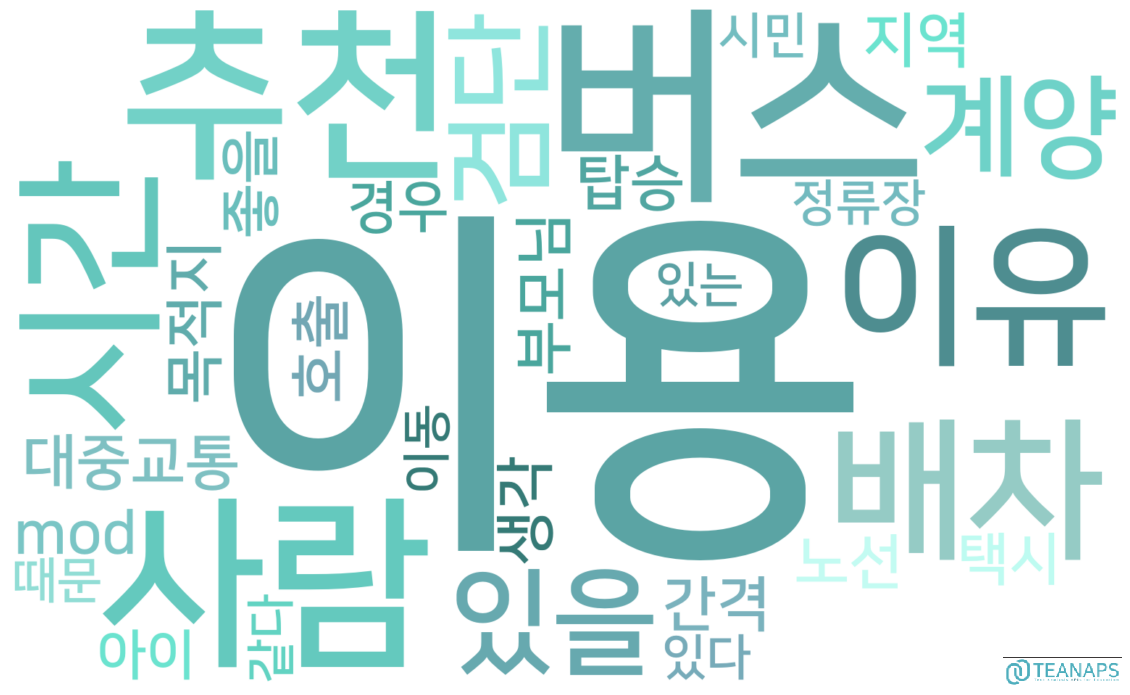

In [43]:
# TF-IDF 기준 워드클라우드를 출력합니다.
count_dict = tfidf.get_tfidf_dict()
tfidf.get_wordcloud(count_dict)

## 토픽모델링

In [44]:
from teanaps.text_analysis import TopicClustering

tc = TopicClustering()

In [45]:
# 토큰화 문장이 안나오는 것들 삭제
livinglab.isna().sum()

start_point          0
get_on               0
get_off              0
end_point            0
recommend            0
Tokens               0
Token_Content        0
NNG_Token_Content    0
dtype: int64

In [46]:
livinglab = livinglab.dropna(axis = 0)
livinglab = livinglab.reset_index(drop=True)
livinglab.isna().sum()

start_point          0
get_on               0
get_off              0
end_point            0
recommend            0
Tokens               0
Token_Content        0
NNG_Token_Content    0
dtype: int64

In [47]:
result = tc.topic_modeling("lda", livinglab["Token_Content"], 3, 10)  
model = tc.get_model()
tc.display_model_result(model)

In [48]:
# 토픽별 키워드 결과
print(result)

[(0, [('버스', 0.046383094), ('이용', 0.03448065), ('배차', 0.018837284), ('검단', 0.01607285), ('추천', 0.01515946), ('사람', 0.0147744445), ('I-MOD', 0.013492977), ('대중교통', 0.010872855), ('택시', 0.01086866), ('호출', 0.009582879)]), (1, [('추천', 0.03878688), ('이용', 0.028381744), ('이유', 0.02415791), ('시간', 0.02046733), ('버스', 0.018880494), ('탑승', 0.017774105), ('목적지', 0.015092544), ('때문', 0.012462989), ('아이', 0.011112557), ('사람', 0.010970241)]), (2, [('같다', 0.026950292), ('홍보', 0.023487922), ('사람', 0.01752613), ('이용', 0.013896532), ('좋을', 0.010893596), ('버스', 0.01072291), ('불편한', 0.007606517), ('타고', 0.007557017), ('계양역', 0.0075406022), ('기사', 0.007534198)])]


In [49]:
# 문서 토픽
lda_result = tc.get_topics_sentences(livinglab["Token_Content"])
lda_result

,Dominant_Topic,Perc_Contribution,Topic_Keywords,Token_Content
0,0.0,0.8131,"버스, 이용, 배차, 검단, 추천, 사람, I-MOD, 대중교통, 택시, 호출",버스 이용 사람
1,0.0,0.8130,"버스, 이용, 배차, 검단, 추천, 사람, I-MOD, 대중교통, 택시, 호출",버스 이용 사람
2,0.0,0.9573,"버스, 이용, 배차, 검단, 추천, 사람, I-MOD, 대중교통, 택시, 호출",날 등 기상 안 좋은 날 짐 많을 때 거동 불편한 분 이동 생기 택시 대신 를 이용...
3,1.0,0.9785,"추천, 이용, 이유, 시간, 버스, 탑승, 목적지, 때문, 아이, 사람",추천 짐 많거나 목적지 거리 멀지만 시간 여유 있는 시민 이유 탑승 때 발판 버스 ...
4,1.0,0.9646,"추천, 이용, 이유, 시간, 버스, 탑승, 목적지, 때문, 아이, 사람",추천 시간 넉넉하고 쾌적하게 이동 사람 이유 배차 빠르게 진행 안될 수 있고 중간 ...
5,1.0,0.9692,"추천, 이용, 이유, 시간, 버스, 탑승, 목적지, 때문, 아이, 사람",목적지 편리하게 쾌적하게 시민 이유 목적지 비슷한 사람 끼리 동승 때문 정차 목적지...
6,0.0,0.9734,"버스, 이용, 배차, 검단, 추천, 사람, I-MOD, 대중교통, 택시, 호출",추천 검단 빠르고 편리하게 이동 시민 이유 검단 신도시 밖 대중교통 타고 검단 신도...
7,1.0,0.9031,"추천, 이용, 이유, 시간, 버스, 탑승, 목적지, 때문, 아이, 사람",추천 없음 이유 특이 사항 없음
8,0.0,0.9743,"버스, 이용, 배차, 검단, 추천, 사람, I-MOD, 대중교통, 택시, 호출",추천 짐 많은 사람 캐리어 대중교통 이용 사람 이유 대중교통 이용 무거운 짐 버스 ...
9,0.0,0.9778,"버스, 이용, 배차, 검단, 추천, 사람, I-MOD, 대중교통, 택시, 호출",혼자 마을 마을 로만 동시 굉장히 가성 비 좋고 편리한 교통 수단 것 같다 버스 비...


In [50]:
livinglab["TOPIC"] = lda_result["Dominant_Topic"]
livinglab["TOPIC_Keywords"] = lda_result["Topic_Keywords"]
livinglab

,start_point,get_on,get_off,end_point,recommend,Tokens,Token_Content,NNG_Token_Content,TOPIC,TOPIC_Keywords
0,일요일에도 여는 한의원이라 치료를 받고 집으로 돌아감,굳이 건너지 않고 버스를 탈 수 있는게 너무 좋았다마침 버스도 근처에 있어5분도 되...,마찬가지로 횡단보도를 건너지 않고 집에 바로 갈 수 있어 너무 좋았다 사소한 거지만...,버스를 탈때보다는 편하게 길도 안 건너고 도착했다,돌아가는 버스를 이용하는 사람들,"[(돌아가는, VV, (0, 4)), (버스, NNG, (5, 7)), (를, JC...",버스 이용 사람,버스 이용 사람,0.0,"버스, 이용, 배차, 검단, 추천, 사람, I-MOD, 대중교통, 택시, 호출"
1,일을 마치고 필라테스 상담을 하고 집에 가는데 버스간격이 길다 그래서 아이모드를 이...,완정역에서 아이모드를 탑승했다 나밖에 탑승하지 않았고 편하게 집으로 왔다 그런데 평...,차가 진짜 멀미가 심하다 이 점때문에 버스나 택시를 이용할 것 같다는 생각을 했다,가까운 직선거리의 버스 노선이라면 버스를 이용하는게 낫겠다 하는 생각이 들었다,돌아가는 버스를 이용하는 사람들,"[(돌아가는, VV, (0, 4)), (버스, NNG, (5, 7)), (를, JC...",버스 이용 사람,버스 이용 사람,0.0,"버스, 이용, 배차, 검단, 추천, 사람, I-MOD, 대중교통, 택시, 호출"
2,검단의 IMOD를 이용하기 전 IMOD가 먼저 도입됐고 관광하기 좋은 송도를 방문하...,센트럴파크에서 관광을 마친 후 테크노파크역에 있는 송도 현대아울렛에서 쇼핑을 하기 ...,탑승은 일반 버스카드를 태그하듯 QR코드를 기기에 태그하기만 하면 돼서 간편했다 I...,우선 IMOD 버스로 시민들이 보다 저렴한 가격에 쾌적한 환경의 이동수단을 제공받을...,비오는 날 등 기상이 안 좋은 날이나 짐이 많을 때 혹은 거동이 불편한 분이 이동할...,"[(비오는, VV, (0, 3)), (날, NNG, (4, 5)), (등, NNG,...",날 등 기상 안 좋은 날 짐 많을 때 거동 불편한 분 이동 생기 택시 대신 를 이용...,날 등 기상 안 날 짐 때 거동 분 이동 생기 택시 대신 를 이용 시 전철 이용 것...,0.0,"버스, 이용, 배차, 검단, 추천, 사람, I-MOD, 대중교통, 택시, 호출"
3,여자친구와 함께 송도 센트럴파크에 놀러갔다 오랜 시간동안 걸으니 피로가 많이 쌓여서...,카페에서 IMOD호출을 눌렀는데 배차가 되지 않아 20분 정도 기다렸던 것 같다 처...,탑승한 사람이 나와 여자친구밖에 없어서 그런지 최단경로로 목적지까지 이동할 수 있었...,처음이라 비교적 짧은 거리만 이동했지만 다음에는 좀 더 긴 거리를 목적지로 설정해서...,\n추천 짐이 많거나 목적지까지 거리가 멀지만 시간여유가 있는 시민\n이유 1 ...,"[( \n, OL, (0, 2)), (추천, NNG, (2, 4)), (짐, NNG...",추천 짐 많거나 목적지 거리 멀지만 시간 여유 있는 시민 이유 탑승 때 발판 버스 ...,추천 짐 목적지 거리 시간 여유 시민 이유 탑승 때 발판 버스 지하철 탑승 때문 짐...,1.0,"추천, 이용, 이유, 시간, 버스, 탑승, 목적지, 때문, 아이, 사람"
4,송도에서 놀기 위해 차를 타고 송도로 향했다 송도에서 여기저기를 방문할 예정이라 차...,20분 후에 IMOD에 탑승할 수 있었고 IMOD안에는 추가로 다른 승객이 탑승해 ...,기다린 시간을 포함하여 35분 만에 목적지에 도착할 수 있었다 IMOD를 다른 승객...,하지만 여전히 서비스는 편리했고 쾌적하게 이동할 수 있었다 배차가 진행되지 않았을 ...,\n추천 시간이 넉넉하고 쾌적하게 이동하고 싶은 사람\n이유 배차가 빠르게 진...,"[( \n, OL, (0, 2)), (추천, NNG, (2, 4)), (시간, NN...",추천 시간 넉넉하고 쾌적하게 이동 사람 이유 배차 빠르게 진행 안될 수 있고 중간 ...,추천 시간 이동 사람 이유 배차 진행 수 중간 경로 변경 수 시간 사람 늦 수,1.0,"추천, 이용, 이유, 시간, 버스, 탑승, 목적지, 때문, 아이, 사람"
5,검암역에서 볼일이 있어 나왔다가 검단 신도시에 있는 투썸플레이스에 가기 위해 네이버...,완정역에서 버스를 탈 생각을 하고 4번 출구로 나왔더니 4번 출구 앞 버스정류장에 ...,완정역에서 버스를 탈 생각으로 경로 검색을 하면서 역을 나오고 있었는데 출구 바로 ...,앱에서 현재 나의 위치를 확인할 수 있고 하차시점에 핸드폰으로 푸시 알림이 와서 너...,목적지까지 편리하게 쾌적하게 가고 싶은 시민\n이유 목적지가 비슷한 사람들끼리 동...,"[(목적지, NNG, (0, 3)), (까지, JC, (3, 5)), (편리하게, ...",목적지 편리하게 쾌적하게 시민 이유 목적지 비슷한 사람 끼리 동승 때문 정차 목적지...,목적지 시민 이유 목적지 사람 끼리 동승 때문 정차 목적지 수 무엇 정해진 인원 때문,1.0,"추천, 이용, 이유, 시간, 버스, 탑승, 목적지, 때문, 아이, 사람"
6,마곡나루역에서 선약이 있어 어떻게 갈지 고민 중이었다 이제 봄이 오면서 날씨가 좋아...,유현사거리에서 호출을 하려고 정류장에 도착해 앱을 실행하니 10분이 지나도 배차가 ...,IMOD가 아직 대중화되지 않아서인지 나 혼자 탑승하였고 정차 없이 완정역으로 바로...,itrip으로 경로 검색 후 IMOD 호출 시 IMOD 앱 서버가 불안정한 지 IM...,추천 검단신도시내에서 빠르고 편리하게 이동하고 싶은 시민\n이유 검단신도시 밖에...,"[(추천, NNG, (0, 2)), (검단, VA, (4, 6)), (신도시내에서,...",추천 검단 빠르고 편리하게 이동 시민 이유 검단 신도시 밖 대중교통 타고 검단 신도...,추천 이동 시민 이유 신도시 밖 대중교통 타고 신도시 경우 대중교통 추가 를 호출 ...,0.0,"버스, 이용, 배차, 검단, 추천, 사람, I-MOD, 대중교통, 택시, 호출"
7,신도시 특성상 퇴근시간 이후는 배차 자채가 어려움 수번을 호출을 해도 응답하지 않음...,다행이 해당 버스는 정확한 정류장에 도착하였으며 기사님의 응대 혹은 승차 고객의 ...,신도시의 특성상 거주하는 아파트 인접한 곳에 많은 상권이 형성되지 않은 탓에 기...,신도시를 고려하지 않은 노선과 운영 방침 기존 여타 다른 신도시 송도 영...,\n추천 없음\n이유 특이사항 없음,"[( \n, OL, (0, 2)), (추천, NNG, (2, 4)), (없음, VA...",추천 없음 이유 특이 사항 없음,추천 이유 특이 사항,1.0,"추천, 이용, 이유, 시간, 버스, 탑승, 목적지, 때문, 아이, 사람"
8,드디어 격리가 끝났다 격리가 끝나고 주민센터에서 격리 지원금 신청서를 쓰고 엄마와 ...,다른 분들의 후기도 들어보고 제대로 사용법을 알게 되니 얼른 버스를 타보고 싶다는 ...,계양역까지 굉장히 편하게 이동하였고 이용하는 사람들도 없어서 택시같은 느낌이었다 안...,계양역에 도착하였다 계양역까지 편하고 빠르게 이동할 수 있었다 버스 이용범위가 더...,\n추천 짐이 많은 사람 캐리어를 들고 대중교통을 이용해야하는 사람\n이유 ...,"[( \n, OL, (0, 2)), (추천, NNG, (2, 4)), (짐, NNG...",추천 짐 많은 사람 캐리어 대중교통 이용 사람 이유 대중교통 이용 무거운 짐 버스 ...,추천 짐 사람 캐리어 대중교통 이용 사람 이유 대중교통 이용 짐 버스 계단 버스 수...,0.0,"버스, 이용, 배차, 검단, 추천, 사람, I-MOD, 대중교통, 택시, 호출"
9,생일을 맞이해 쉐라톤 호텔에서 호캉스를 즐기고 귀가하기 위해 아이모드를 타고 가까운...,월요일 늦은 10시가 다 되어가는 시간이라 바로 배차가 됐다 15분 후 탑승 가능하...,기사님이 운전을 잘 하셔서 편안하게 목적지까지 도착할 수 있었다 13분 탑승했고 2...,송도는 확실히 imod 이용이 검단계양보다 활발해서 28일에 2번 이용하는데 모두 ...,혼자’ 마을에서 마을로만’ 이동시 굉장히 가성비 좋고 

In [52]:
livinglab.to_csv("/home/teanaps_home/workspace/local/리빙랩_Token_Topic_DATA.csv", encoding = "utf-8", index = False)

## 동시 출현 단어

In [12]:
from teanaps.text_analysis import CoWordCalculator

co = CoWordCalculator()

In [54]:
# 빈도수 15 이상인 모든 명사와 형용사 단어에 대해서 동시출현 빈도 계산
stopwords_df.head()

,count,WORD,TAG
0,42,버스,NNG
1,31,이용,NNG
2,28,호출,NNG
3,26,시간,NNG
4,25,정류장,NNG


In [55]:
tokenized_sentence_list = livinglab["Token_Content"]


# 토픽모델링 키워드 단어들
node_list = ["탑승", "버스", "이용", "기능", "결제", "호출", "알림", "사람", 
             "이용", "추천"]

co.calculation_co_matrix(tokenized_sentence_list, node_list=node_list)
co_result = co.get_edge_list()
print(co_result)

[(('버스', '버스'), 78), (('이용', '이용'), 61), (('추천', '추천'), 50), (('사람', '사람'), 30), (('탑승', '탑승'), 23), (('버스', '이용'), 21), (('이용', '버스'), 21), (('이용', '사람'), 11), (('사람', '이용'), 11), (('호출', '호출'), 11), (('기능', '기능'), 10), (('결제', '결제'), 10), (('버스', '사람'), 9), (('사람', '버스'), 9), (('추천', '사람'), 8), (('사람', '추천'), 8), (('추천', '버스'), 8), (('버스', '추천'), 8), (('탑승', '기능'), 7), (('기능', '탑승'), 7), (('알림', '알림'), 6), (('버스', '호출'), 5), (('호출', '버스'), 5), (('알림', '기능'), 5), (('기능', '알림'), 5), (('탑승', '버스'), 4), (('버스', '탑승'), 4), (('이용', '추천'), 4), (('추천', '이용'), 4), (('기능', '결제'), 4), (('호출', '결제'), 4), (('결제', '기능'), 4), (('결제', '호출'), 4), (('탑승', '알림'), 4), (('알림', '탑승'), 4), (('탑승', '결제'), 3), (('결제', '탑승'), 3), (('기능', '호출'), 2), (('호출', '기능'), 2), (('탑승', '사람'), 2), (('사람', '탑승'), 2), (('탑승', '이용'), 1), (('이용', '탑승'), 1), (('호출', '이용'), 1), (('이용', '호출'), 1), (('탑승', '호출'), 1), (('호출', '탑승'), 1), (('결제', '알림'), 1), (('알림', '결제'), 1), (('추천', '호출'), 1), (('호출', '추천'), 1), (('탑승', '추천'), 1),

In [56]:
co.get_co_matrix_graph(20)

In [57]:
centrality_dict = co.get_centrality("d_cent")
co.get_word_network_graph(centrality_dict,  mode="markers")

In [58]:
centrality_dict = co.get_centrality("d_cent")
co.get_word_network_graph(centrality_dict,  mode="text")

## 감성분석

In [2]:
import pandas as pd

data = pd.read_csv("/home/teanaps_home/workspace/local/livinglab_final2.csv")
data.head()

,start_point,get_on,get_off,end_point,recommend
0,일요일에도 여는 한의원이라 치료를 받고 집으로 돌아감,굳이 건너지 않고 버스를 탈 수 있는게 너무 좋았다마침 버스도 근처에 있어5분도 되...,마찬가지로 횡단보도를 건너지 않고 집에 바로 갈 수 있어 너무 좋았다 사소한 거지만...,버스를 탈때보다는 편하게 길도 안 건너고 도착했다,돌아가는 버스를 이용하는 사람들
1,일을 마치고 필라테스 상담을 하고 집에 가는데 버스간격이 길다 그래서 아이모드를 이...,완정역에서 아이모드를 탑승했다 나밖에 탑승하지 않았고 편하게 집으로 왔다 그런데 평...,차가 진짜 멀미가 심하다 이 점때문에 버스나 택시를 이용할 것 같다는 생각을 했다,가까운 직선거리의 버스 노선이라면 버스를 이용하는게 낫겠다 하는 생각이 들었다,돌아가는 버스를 이용하는 사람들
2,검단의 IMOD를 이용하기 전 IMOD가 먼저 도입됐고 관광하기 좋은 송도를 방문하...,센트럴파크에서 관광을 마친 후 테크노파크역에 있는 송도 현대아울렛에서 쇼핑을 하기 ...,탑승은 일반 버스카드를 태그하듯 QR코드를 기기에 태그하기만 하면 돼서 간편했다 I...,우선 IMOD 버스로 시민들이 보다 저렴한 가격에 쾌적한 환경의 이동수단을 제공받을...,비오는 날 등 기상이 안 좋은 날이나 짐이 많을 때 혹은 거동이 불편한 분이 이동할...
3,여자친구와 함께 송도 센트럴파크에 놀러갔다 오랜 시간동안 걸으니 피로가 많이 쌓여서...,카페에서 IMOD호출을 눌렀는데 배차가 되지 않아 20분 정도 기다렸던 것 같다 처...,탑승한 사람이 나와 여자친구밖에 없어서 그런지 최단경로로 목적지까지 이동할 수 있었...,처음이라 비교적 짧은 거리만 이동했지만 다음에는 좀 더 긴 거리를 목적지로 설정해서...,\n추천 짐이 많거나 목적지까지 거리가 멀지만 시간여유가 있는 시민\n이유 1 ...
4,송도에서 놀기 위해 차를 타고 송도로 향했다 송도에서 여기저기를 방문할 예정이라 차...,20분 후에 IMOD에 탑승할 수 있었고 IMOD안에는 추가로 다른 승객이 탑승해 ...,기다린 시간을 포함하여 35분 만에 목적지에 도착할 수 있었다 IMOD를 다른 승객...,하지만 여전히 서비스는 편리했고 쾌적하게 이동할 수 있었다 배차가 진행되지 않았을 ...,\n추천 시간이 넉넉하고 쾌적하게 이동하고 싶은 사람\n이유 배차가 빠르게 진...


In [3]:
from teanaps.text_analysis import SentimentAnalysis

senti = SentimentAnalysis(model_path="/home/teanaps_home/workspace/local/senti_model", kobert_path="/home/teanaps_home/workspace/local/mxnet_kobert")




In [4]:
data_step1 = data.loc[:, ['start_point']] # 출발단계
data_step2 = data.loc[:, ['get_on']] # 탑승단계
data_step3 = data.loc[:, ['get_off']] # 하차단계
data_step4 = data.loc[:, ['end_point']] # 도착단계
data_step5 = data.loc[:, ['recommend']] # 추천대상

In [5]:
data_step1_dr = data_step1.dropna(axis = 0)
data_step2_dr = data_step2.dropna(axis = 0)
data_step3_dr = data_step3.dropna(axis = 0)
data_step4_dr = data_step4.dropna(axis = 0)
data_step5_dr = data_step5.dropna(axis = 0)

In [6]:
data_step1_dr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 0 to 46
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   start_point  47 non-null     object
dtypes: object(1)
memory usage: 752.0+ bytes


In [7]:
data_step2_dr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 0 to 46
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   get_on  47 non-null     object
dtypes: object(1)
memory usage: 752.0+ bytes


In [8]:
data_step3_dr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 0 to 46
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   get_off  47 non-null     object
dtypes: object(1)
memory usage: 752.0+ bytes


In [9]:
data_step4_dr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 0 to 46
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   end_point  47 non-null     object
dtypes: object(1)
memory usage: 752.0+ bytes


In [10]:
data_step5_dr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 0 to 46
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   recommend  47 non-null     object
dtypes: object(1)
memory usage: 752.0+ bytes


In [11]:
data_step1_dr.head()

,start_point
0,일요일에도 여는 한의원이라 치료를 받고 집으로 돌아감
1,일을 마치고 필라테스 상담을 하고 집에 가는데 버스간격이 길다 그래서 아이모드를 이...
2,검단의 IMOD를 이용하기 전 IMOD가 먼저 도입됐고 관광하기 좋은 송도를 방문하...
3,여자친구와 함께 송도 센트럴파크에 놀러갔다 오랜 시간동안 걸으니 피로가 많이 쌓여서...
4,송도에서 놀기 위해 차를 타고 송도로 향했다 송도에서 여기저기를 방문할 예정이라 차...


### 데이터의 긍정/부정 분류

In [12]:
df_1 = data_step1_dr
df_2 = data_step2_dr
df_3 = data_step3_dr
df_4 = data_step4_dr
df_5 = data_step5_dr

In [13]:
df1 = df_1.reset_index(drop=True)
df2 = df_2.reset_index(drop=True)
df3 = df_3.reset_index(drop=True)
df4 = df_4.reset_index(drop=True)

In [14]:
#https://github.com/SKTBrain/KoBERT/issues/89
#positive, neutral, negative
sentence = "너무 짜증이 난다"
result = senti.tag(sentence)
print(result)

((0.9669, 0.0271), 'negative')


In [15]:
df1["start_point"][3]

'여자친구와 함께 송도 센트럴파크에 놀러갔다 오랜 시간동안 걸으니 피로가 많이 쌓여서\n근처 카페에서 쉬다가 가기로 했다 충분히 쉰 후에 집에 가려고 교통편을 알아보니\n버스 정류장이나 지하철역은 걸어가기에 거리가 약간 멀었고 택시를 타자니 비싼 가격이 우려되었다\n그래서 가까운 거리에 정류장이 많은 IMOD를 이용해보기로 하였다 리뷰를 보니 배차시간이 너무  길어\n이용이 불편하다는 평이 많았지만 편하고 부담되지 않는 가격으로 이동할 수 있으니 한번 이용해보기로 했다\n배차가 바로 잡히기를 간절히 바랬던 것 같다'

In [18]:
df_10 = pd.DataFrame(columns = ['start_point', 'sentiment'])

In [ ]:
for i in range(0, len(df1)):
    result = senti.tag(df1["start_point"][i], neutral_th = 0.3)
    review = df1["start_point"][i]
    df_10.loc[i] = [review, result[1]]
df_10.head()

In [ ]:
df_20 = pd.DataFrame(columns = ['get_on', 'sentiment'])

In [ ]:
for i in range(0, len(df2)):
    result = senti.tag(df2["get_on"][i], neutral_th = 0.3)
    review = df2["get_on"][i]
    df_20.loc[i] = [review, result[1]]
df_20.head()

In [ ]:
df_30 = pd.DataFrame(columns = ['get_off', 'sentiment'])

In [ ]:
for i in range(0, len(df3)):
    result = senti.tag(df3["get_off"][i], neutral_th = 0.3)
    review = df3["get_off"][i]
    df_30.loc[i] = [review, result[1]]
df_30.head()

In [ ]:
df_40 = pd.DataFrame(columns = ['end_point', 'sentiment'])

In [ ]:
for i in range(0, len(df4)):
    result = senti.tag(df4["end_point"][i], neutral_th = 0.3)
    review = df4["end_point"][i]
    df_40.loc[i] = [review, result[1]]
df_40.head()

In [ ]:
df_50 = pd.DataFrame(columns = ['recommend', 'sentiment'])

In [ ]:
for i in range(0, len(df5)):
    result = senti.tag(df5["recommend"][i], neutral_th = 0.3)
    review = df5["recommend"][i]
    df_50.loc[i] = [review, result[1]]
df_50.head()

In [ ]:
count_p = 0
count_n = 0
count_p_n = 0

for i in range(0, len(df_10)):
    if df_10["sentiment"][i] == "positive":
        count_p += 1
    elif df_10["sentiment"][i] == "negative":
        count_n += 1
    elif df_10["sentiment"][i] == "neutral":
        count_p_n += 1

In [ ]:
percent_p = count_p / len(df_10)
percent_n = count_n / len(df_10)
percent_p_n = count_p_n / len(df_10)
print(percent_p)
print(percent_n)
print(percent_p_n)

In [ ]:
count_p = 0
count_n = 0
count_p_n = 0

for i in range(0, len(df_20)):
    if df_20["sentiment"][i] == "positive":
        count_p += 1
    elif df_20["sentiment"][i] == "negative":
        count_n += 1
    elif df_20["sentiment"][i] == "neutral":
        count_p_n += 1

In [ ]:
percent_p = count_p / len(df_20)
percent_n = count_n / len(df_20)
percent_p_n = count_p_n / len(df_20)
print(percent_p)
print(percent_n)
print(percent_p_n)

In [ ]:
count_p = 0
count_n = 0
count_p_n = 0

for i in range(0, len(df_30)):
    if df_30["sentiment"][i] == "positive":
        count_p += 1
    elif df_30["sentiment"][i] == "negative":
        count_n += 1
    elif df_30["sentiment"][i] == "neutral":
        count_p_n += 1

In [ ]:
percent_p = count_p / len(df_30)
percent_n = count_n / len(df_30)
percent_p_n = count_p_n / len(df_30)
print(percent_p)
print(percent_n)
print(percent_p_n)

In [ ]:
count_p = 0
count_n = 0
count_p_n = 0

for i in range(0, len(df_40)):
    if df_40["sentiment"][i] == "positive":
        count_p += 1
    elif df_40["sentiment"][i] == "negative":
        count_n += 1
    elif df_40["sentiment"][i] == "neutral":
        count_p_n += 1

In [ ]:
percent_p = count_p / len(df_40)
percent_n = count_n / len(df_40)
percent_p_n = count_p_n / len(df_40)
print(percent_p)
print(percent_n)
print(percent_p_n)

In [ ]:
count_p = 0
count_n = 0
count_p_n = 0

for i in range(0, len(df_50)):
    if df_50["sentiment"][i] == "positive":
        count_p += 1
    elif df_50["sentiment"][i] == "negative":
        count_n += 1
    elif df_50["sentiment"][i] == "neutral":
        count_p_n += 1

In [ ]:
percent_p = count_p / len(df_50)
percent_n = count_n / len(df_50)
percent_p_n = count_p_n / len(df_50)
print(percent_p)
print(percent_n)
print(percent_p_n)